In [2]:
import csv
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
import plotly.offline as py
py.init_notebook_mode(connected = True)
import plotly.graph_objs as go
from plotly.offline import plot, iplot
import plotly.express as px 

This dataset contains the latest and most up-to-date health statistics from around the world.
From this dataset we will be looking at major attributes such as:

1. Infant mortality rate
2. Alcohol substance abuse
3. Suicide rate 
4. Population percentage that spends more than 25% of expenditure on healthcare
5. Life Expectancy At Birth

In the World Health Statistics datasets, the columns relevant to our exploration (infant
mortality rate, alcohol substance abuse, suicide rate and population percentage that
spends more than 25% of expenditure on healthcare) have to be mapped according to
the countries and any missing or anomalous data points will be omitted

In [3]:
infantMortalityRate = pd.read_csv('C:/Users/thhelen/Desktop/si618_1/si618wn23-main/project/whs/infantMortalityRate.csv')
alcoholSubstanceAbuse = pd.read_csv('C:/Users/thhelen/Desktop/si618_1/si618wn23-main/project/whs/alcoholSubstanceAbuse.csv') 
crudeSuicideRates = pd.read_csv('C:/Users/thhelen/Desktop/si618_1/si618wn23-main/project/whs/crudeSuicideRates.csv')
population25SDG3 = pd.read_csv('C:/Users/thhelen/Desktop/si618_1/si618wn23-main/project/whs/population25SDG3.8.2.csv')
lifeExpectancyAtBirth = pd.read_csv('C:/Users/thhelen/Desktop/si618_1/si618wn23-main/project/whs/lifeExpectancyAtBirth.csv')

# Infant Mortality Rate

In [4]:
infantMortalityRate.head()

Location  Period                                          Indicator  \
0  Afghanistan    2019  Infant mortality rate (probability of dying be...   
1  Afghanistan    2019  Infant mortality rate (probability of dying be...   
2  Afghanistan    2019  Infant mortality rate (probability of dying be...   
3  Afghanistan    2018  Infant mortality rate (probability of dying be...   
4  Afghanistan    2018  Infant mortality rate (probability of dying be...   

         Dim1        First Tooltip  
0  Both sexes  46.51 [37.71-55.82]  
1        Male    49.8 [40.2-59.95]  
2      Female  43.05 [34.82-51.96]  
3  Both sexes  48.04 [39.94-56.32]  
4        Male   51.35 [42.56-60.4]

In [6]:
len(infantMortalityRate)

29999

There are 29999 rows in this dataset.

In [7]:
infantMortalityRate.columns.size

5

There are 5 columns in this dataset.

In [8]:
infantMortalityRate['Indicator'].unique()

array(['Infant mortality rate (probability of dying between birth and age 1 per 1000 live births)'],
      dtype=object)

Dropping the 'Indicator' column because its redundant and renaming the columns.

In [9]:
infantMortalityRate = infantMortalityRate.drop('Indicator', axis=1)
infantMortalityRate.columns = ['country', 'period', 'sex','infant_mortality_rate']

In [10]:
infantMortalityRate['sex'].unique()

array(['Both sexes', 'Male', 'Female'], dtype=object)

Considering only the 'Both sexes' from the 'sex' column values as the 'Male' and 'Female' values are not useful to our analysis. Then dropping the 'sex' column as its now redundant.

In [11]:
infantMortalityRate = infantMortalityRate[infantMortalityRate['sex'] == 'Both sexes']
infantMortalityRate = infantMortalityRate.drop('sex', axis=1)
infantMortalityRate.head()

country  period infant_mortality_rate
0   Afghanistan    2019   46.51 [37.71-55.82]
3   Afghanistan    2018   48.04 [39.94-56.32]
6   Afghanistan    2017   49.61 [42.08-57.23]
9   Afghanistan    2016   51.32 [44.36-58.38]
12  Afghanistan    2015   53.17 [46.81-59.79]

The infant_mortality_rate columns consist of both the 95% confidence interval and the point estimate. The 95% confidence interval values are dropped and only the point estimate values are retained. 

In [12]:
x=infantMortalityRate['infant_mortality_rate'].str.split(' ').str[0]
#infantMortalityRate['infant_mortality_rate_range']=infantMortalityRate['infant_mortality_rate'].str.split(' ').str[1]
infantMortalityRate['infant_mortality_rate']=x

In [13]:
infantMortalityRate.head()

country  period infant_mortality_rate
0   Afghanistan    2019                 46.51
3   Afghanistan    2018                 48.04
6   Afghanistan    2017                 49.61
9   Afghanistan    2016                 51.32
12  Afghanistan    2015                 53.17

In [14]:
infantMortalityRate['period'].nunique()

70

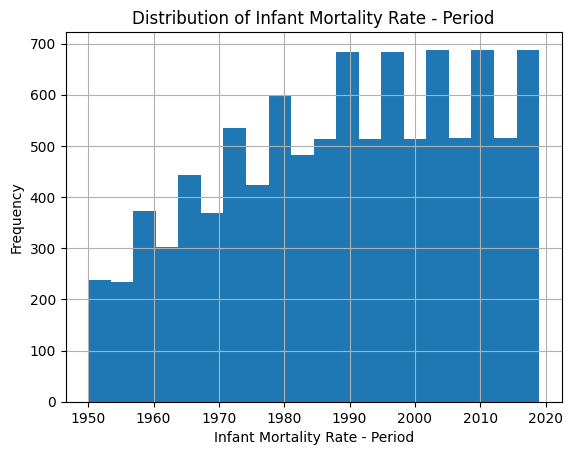

In [15]:
infantMortalityRate['period'].hist(bins=20)
plt.title('Distribution of Infant Mortality Rate - Period')
plt.xlabel('Infant Mortality Rate - Period')
plt.ylabel('Frequency')
plt.show()

There are 70 unique period values ranging from 1950 to 2019.

In [16]:
infantMortalityRate['country'].nunique()

177

There is data for 177 unique countries in this file.

In [17]:
len(infantMortalityRate)

10000

After cleaning, there are 10000 rows in this dataset.

In [18]:
infantMortalityRate.columns.size

3

After cleaning, there are 3 columns in this dataset.

In [19]:
infantMortalityRate.isnull().sum()

country                  0
period                   0
infant_mortality_rate    0
dtype: int64

There are no null values in any of the columns.


In [20]:
infantMortalityRate.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10000 entries, 0 to 29997
Data columns (total 3 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   country                10000 non-null  object
 1   period                 10000 non-null  int64 
 2   infant_mortality_rate  10000 non-null  object
dtypes: int64(1), object(2)
memory usage: 312.5+ KB


Converting the datatype of infant_mortality_rate from object to float for further analysis.

In [21]:
infantMortalityRate['infant_mortality_rate'] = infantMortalityRate['infant_mortality_rate'].astype('float')

In [22]:
infantMortalityRate.describe().T

count         mean        std      min        25%  \
period                 10000.0  1989.124000  18.658152  1950.00  1975.0000   
infant_mortality_rate  10000.0    53.882927  48.325301     1.49    14.8175   

                           50%       75%     max  
period                 1990.00  2005.000  2019.0  
infant_mortality_rate    38.07    81.765   267.7

The infant mortality rate variable has a mean of 53.88 and a standard deviation of 48.33, ranging from 1.49 to 267.7.

The distribution of infant mortality rates is skewed towards higher values because the median (38.07) is lower than the mean infant mortality rate(53.88).

In [23]:
infantMortalityRate_sorted=infantMortalityRate.sort_values('infant_mortality_rate')

<AxesSubplot: xlabel='infant_mortality_rate'>

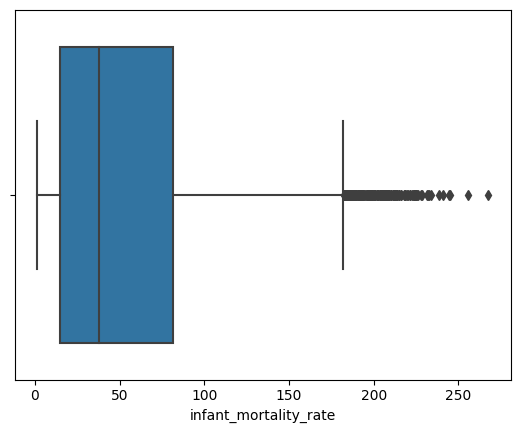

In [24]:
sns.boxplot(x=infantMortalityRate['infant_mortality_rate'])

The middle 50% of the data (interquartile range) is represented by the box in the above plot. The median, represented by the line inside the box is around 38.

In [25]:
top_5_infantMortalityRate = pd.unique(infantMortalityRate_sorted['country'])[:5]
last_5_infantMortalityRate = pd.unique(infantMortalityRate_sorted['country'])[-5:]
last_5_infantMortalityRate

array(['Nigeria', 'Sierra Leone', 'Central African Republic',
       'Kiribati (until 1984)', 'India (until 1975)'], dtype=object)

The 5 countries with the lowest Infant Mortality Rates:

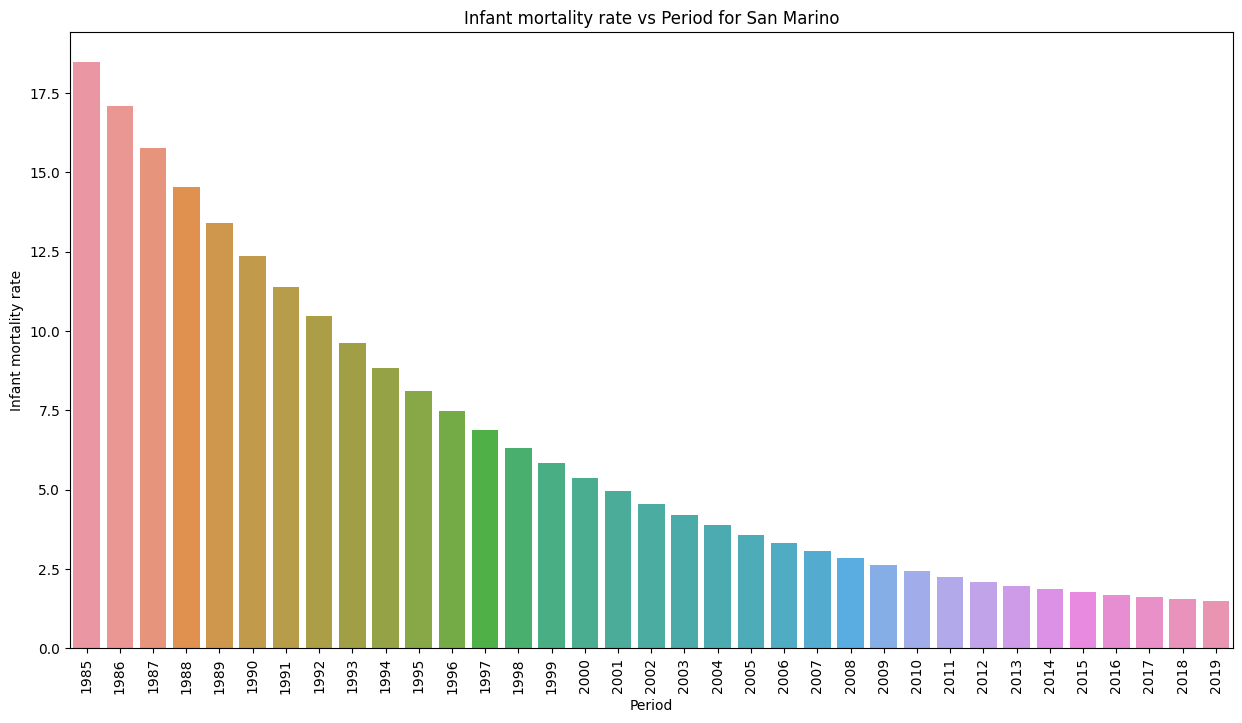

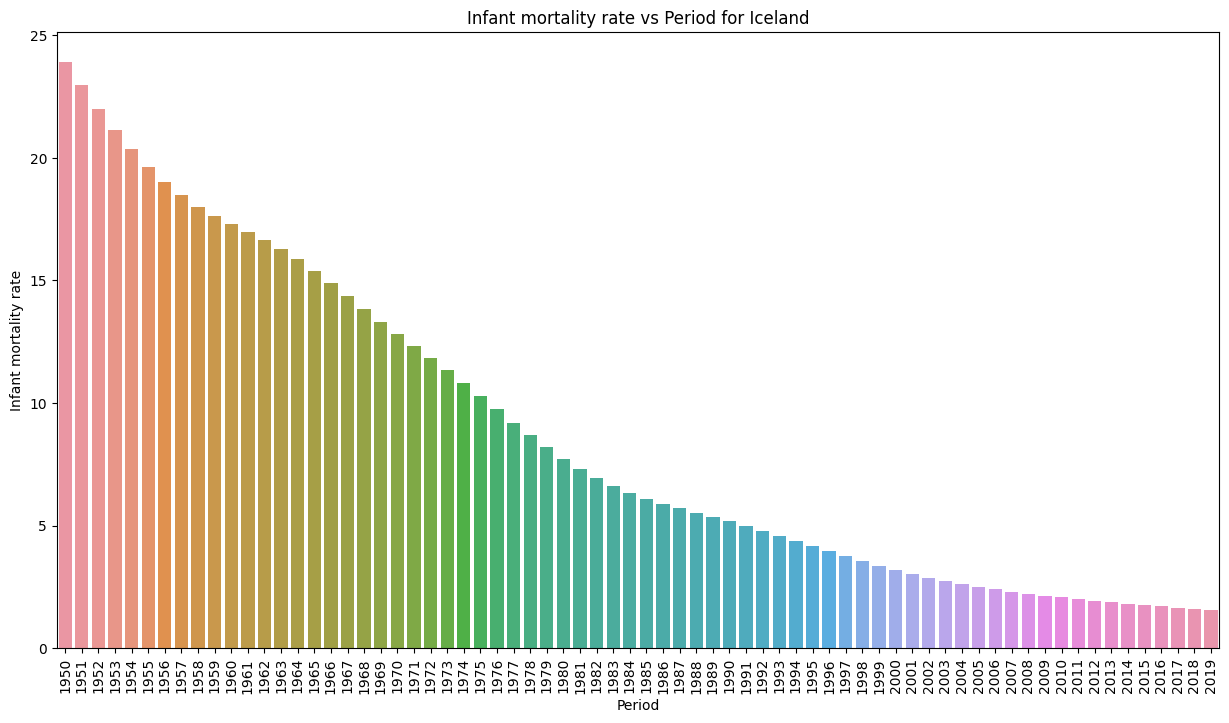

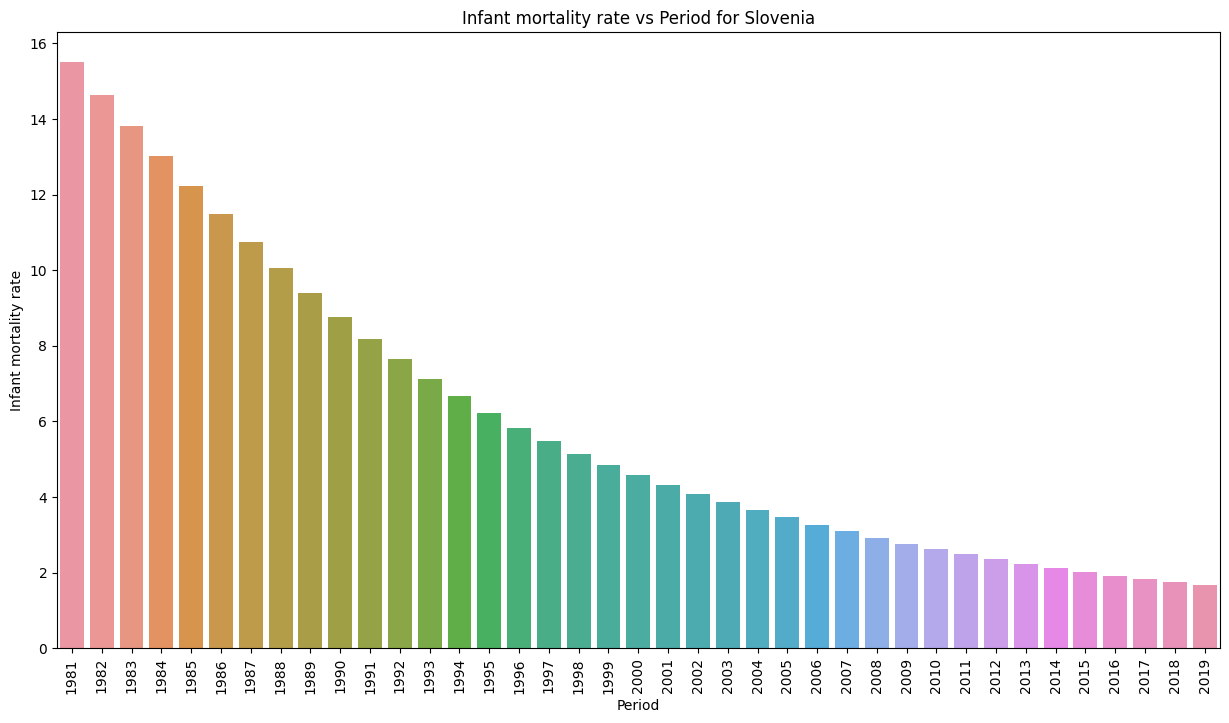

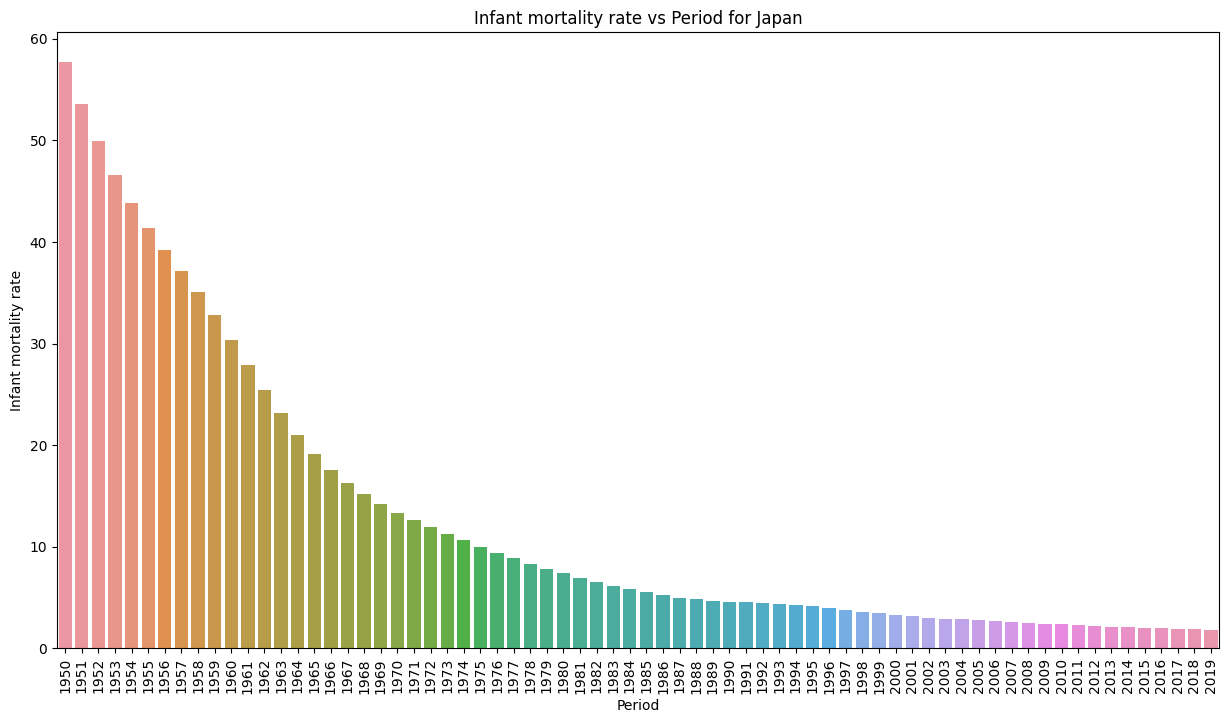

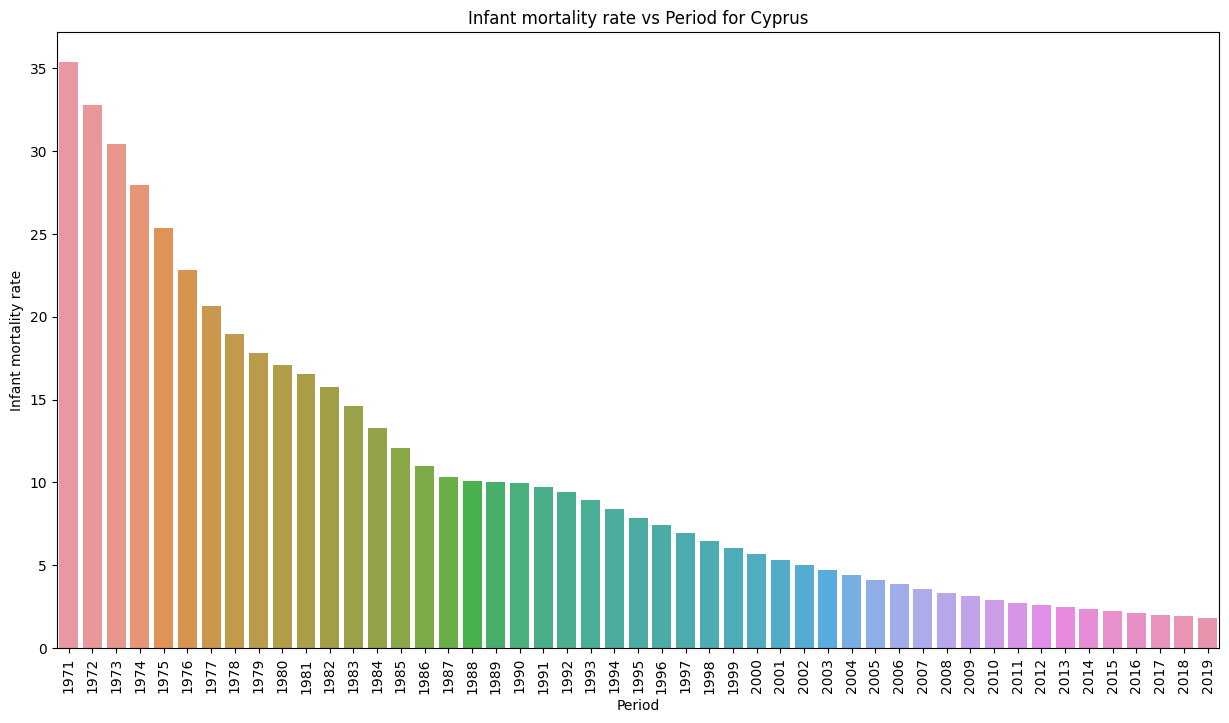

In [26]:
for i in top_5_infantMortalityRate:
    infantMortalityRate_specific_country = infantMortalityRate[infantMortalityRate['country'] == i]
    f, ax = plt.subplots(figsize=(15, 8))
    sns.set_color_codes("pastel")
    sns.barplot(x=infantMortalityRate_specific_country['period'],y=infantMortalityRate_specific_country['infant_mortality_rate'])
    plt.title('Infant mortality rate vs Period for {}'.format(i))
    plt.xlabel('Period')
    plt.ylabel('Infant mortality rate')
    plt.xticks(fontsize=10, rotation=90)
    plt.show()

The 5 countries with the highest Infant Mortality Rates:

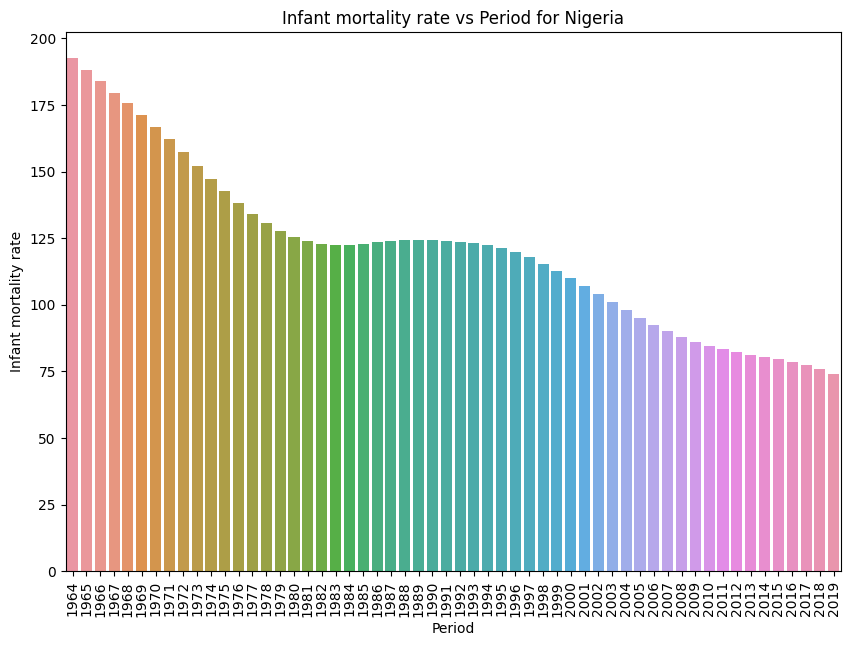

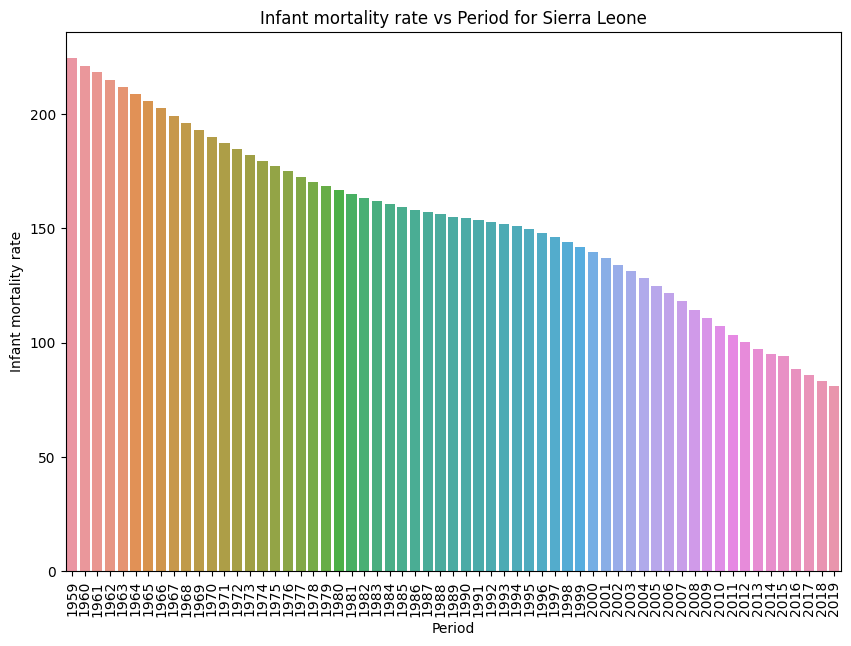

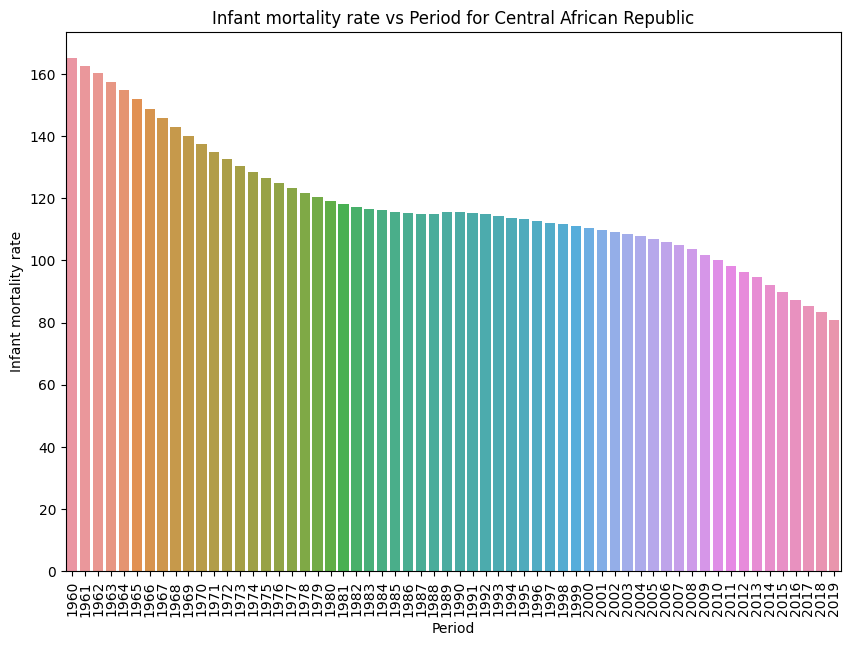

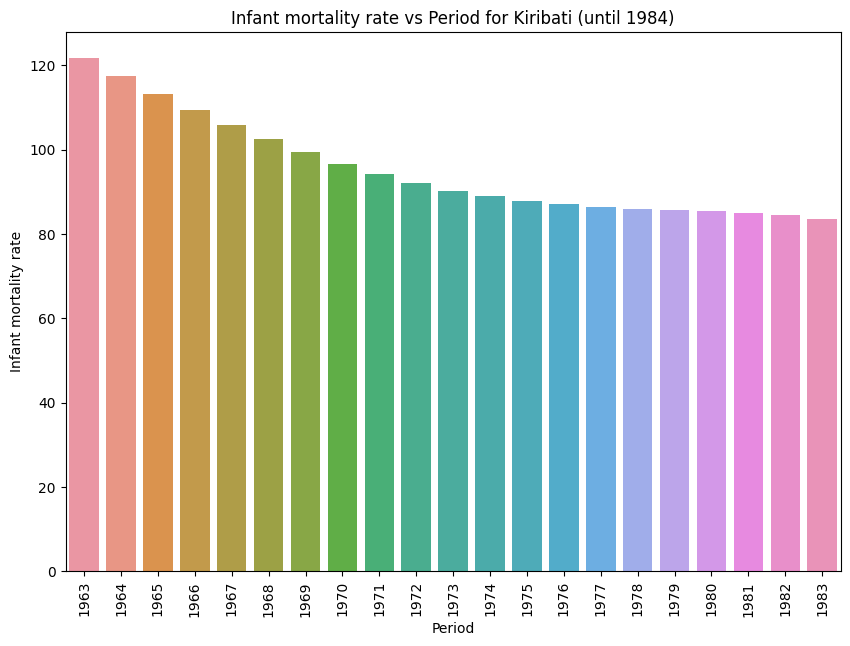

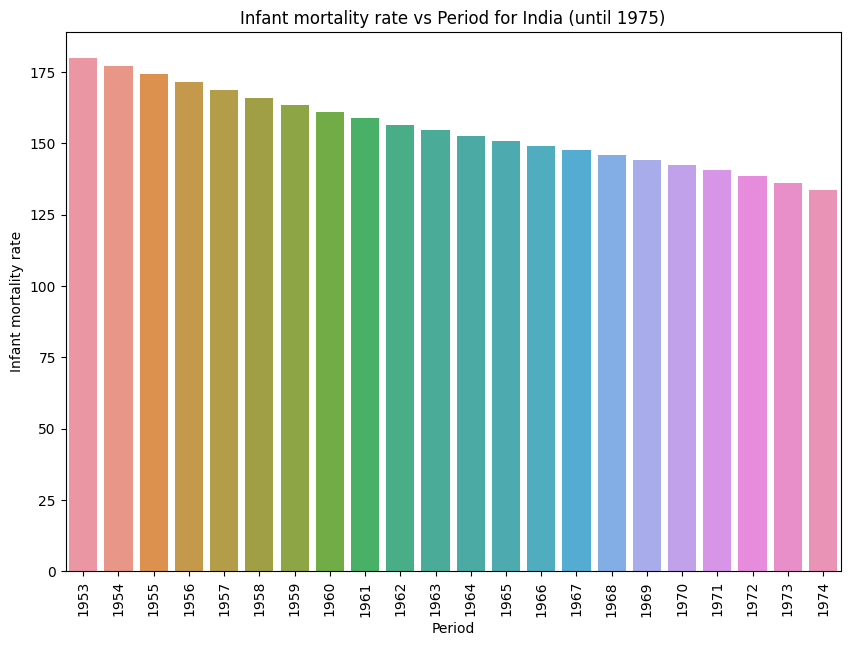

In [27]:
for i in last_5_infantMortalityRate:
    infantMortalityRate_specific_country = infantMortalityRate[infantMortalityRate['country'] == i]
    f, ax = plt.subplots(figsize=(10, 7))
    sns.set_color_codes("pastel")
    sns.barplot(x=infantMortalityRate_specific_country['period'],y=infantMortalityRate_specific_country['infant_mortality_rate'])
    plt.title('Infant mortality rate vs Period for {}'.format(i))
    plt.xlabel('Period')
    plt.ylabel('Infant mortality rate')
    plt.xticks(fontsize=10, rotation=90)
    plt.show()

In [148]:
top_10_infantMortalityRate = pd.unique(infantMortalityRate_sorted['country'])[:10]
last_10_infantMortalityRate = pd.unique(infantMortalityRate_sorted['country'])[-10:]
last_10_infantMortalityRate

array(['Guinea', 'Democratic Republic of the Congo', 'Lesotho', 'Chad',
       'Somalia', 'Nigeria', 'Sierra Leone', 'Central African Republic',
       'Kiribati (until 1984)', 'India (until 1975)'], dtype=object)

In [149]:
infantMortalityRate_last10 = pd.DataFrame()
for i in last_10_infantMortalityRate:
    infantMortalityRate_last10 = pd.concat([infantMortalityRate_last10, infantMortalityRate[infantMortalityRate['country'] == i]],axis=0)

infantMortalityRate_top10 = pd.DataFrame()
for i in top_10_infantMortalityRate:
    infantMortalityRate_top10 = pd.concat([infantMortalityRate_top10, infantMortalityRate[infantMortalityRate['country'] == i]],axis=0)

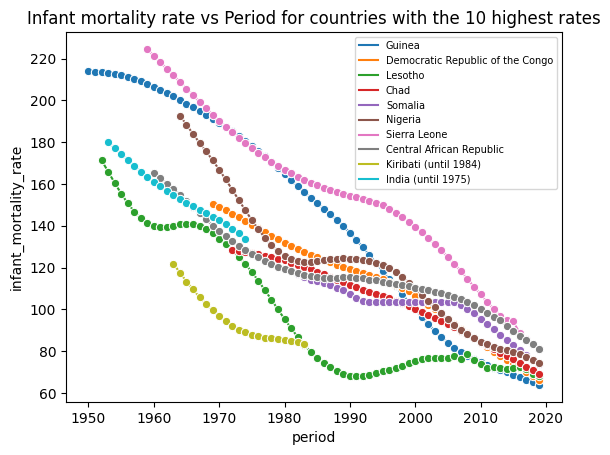

In [160]:
sns.lineplot(data=infantMortalityRate_last10, x='period', y='infant_mortality_rate', hue='country', marker='o')
plt.title('Infant mortality rate vs Period for countries with the 10 highest rates')
plt.legend(loc='upper right', fontsize=7)
plt.show()

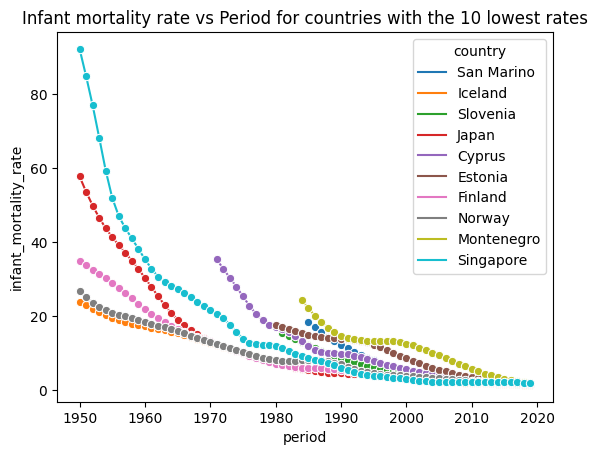

In [157]:
sns.lineplot(data=infantMortalityRate_top10, x='period', y='infant_mortality_rate', hue='country', marker='o')
plt.title('Infant mortality rate vs Period for countries with the 10 lowest rates')
#plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()

The infant mortality rates of countries with the lowest rates decline consistently over the years. Whereas, for countries with the highest rates have also seen an increase in the 90's but overall there is a decreasing trend.

In [31]:
color_scale = px.colors.sequential.Plasma_r
fig = px.choropleth(infantMortalityRate.sort_values(by = 'period'), locations='country', color = 'infant_mortality_rate', animation_frame='period', hover_name = 'country', locationmode='country names', color_continuous_scale=color_scale)
fig.update_layout(height = 560, width = 1000, margin=dict(t=0, b=0, l=0, r=0))

# Alcohol Substance Abuse

In [32]:
alcoholSubstanceAbuse.head()

Location  Period                                          Indicator  \
0  Afghanistan    2018  Total (recorded+unrecorded) alcohol per capita...   
1  Afghanistan    2018  Total (recorded+unrecorded) alcohol per capita...   
2  Afghanistan    2018  Total (recorded+unrecorded) alcohol per capita...   
3  Afghanistan    2015  Total (recorded+unrecorded) alcohol per capita...   
4  Afghanistan    2015  Total (recorded+unrecorded) alcohol per capita...   

         Dim1  First Tooltip  
0  Both sexes          0.210  
1        Male          0.360  
2      Female          0.055  
3  Both sexes          0.210  
4        Male          0.350

In [33]:
len(alcoholSubstanceAbuse)

2787

There are 2787 rows in this dataset.

In [34]:
alcoholSubstanceAbuse.columns.size

5

There are 5 columns in this dataset.

In [35]:
alcoholSubstanceAbuse['Indicator'].unique()

array(['Total (recorded+unrecorded) alcohol per capita (15+) consumption'],
      dtype=object)

Dropping the 'Indicator' column because its redundant and renaming the columns.

In [36]:
alcoholSubstanceAbuse = alcoholSubstanceAbuse.drop('Indicator', axis=1)
alcoholSubstanceAbuse.columns = ['country', 'period', 'sex','alcohol_substance_abuse']

In [37]:
alcoholSubstanceAbuse['sex'].unique()

array(['Both sexes', 'Male', 'Female'], dtype=object)

Considering only the 'Both sexes' from the 'sex' column values as the 'Male' and 'Female' values are not useful to our analysis. Then dropping the 'sex' column as its now redundant.

In [38]:
alcoholSubstanceAbuse = alcoholSubstanceAbuse[alcoholSubstanceAbuse['sex'] == 'Both sexes']
alcoholSubstanceAbuse = alcoholSubstanceAbuse.drop('sex', axis=1)
alcoholSubstanceAbuse.head()

country  period  alcohol_substance_abuse
0   Afghanistan    2018                     0.21
3   Afghanistan    2015                     0.21
6   Afghanistan    2010                     0.21
9       Albania    2018                     7.17
12      Albania    2015                     6.74

In [39]:
alcoholSubstanceAbuse.describe().T

count         mean       std     min      25%  \
period                   929.0  2009.675996  6.524942  2000.0  2005.00   
alcohol_substance_abuse  929.0     6.104245  4.300558     0.0     2.22   

                             50%      75%     max  
period                   2010.00  2015.00  2018.0  
alcohol_substance_abuse     5.65     9.45    20.5

The alcohol_substance_abuse variable has a mean of 6.10 and a standard deviation of 4.3, with values ranging from 0 to 20.5.

In [40]:
alcoholSubstanceAbuse['period'].nunique()

5

In [41]:
alcoholSubstanceAbuse['period'].value_counts()

2018    188
2015    188
2010    187
2005    183
2000    183
Name: period, dtype: int64

There are 5 unique period values: 2000, 2005, 2010, 2015, 2018.

In [42]:
alcoholSubstanceAbuse['country'].nunique()

188

There is data for 188 unique countries in this file.

In [43]:
len(alcoholSubstanceAbuse)

929

After cleaning, there are 929 rows in this dataset.

In [44]:
alcoholSubstanceAbuse.columns.size

3

After cleaning, there are 3 columns in this dataset.

In [45]:
alcoholSubstanceAbuse.isnull().sum()

country                    0
period                     0
alcohol_substance_abuse    0
dtype: int64

There are no null values in any of the columns.

In [46]:
alcoholSubstanceAbuse.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 929 entries, 0 to 2784
Data columns (total 3 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   country                  929 non-null    object 
 1   period                   929 non-null    int64  
 2   alcohol_substance_abuse  929 non-null    float64
dtypes: float64(1), int64(1), object(1)
memory usage: 29.0+ KB


In [47]:
alcoholSubstanceAbuse_sorted=alcoholSubstanceAbuse.sort_values('alcohol_substance_abuse')

<AxesSubplot: xlabel='alcohol_substance_abuse'>

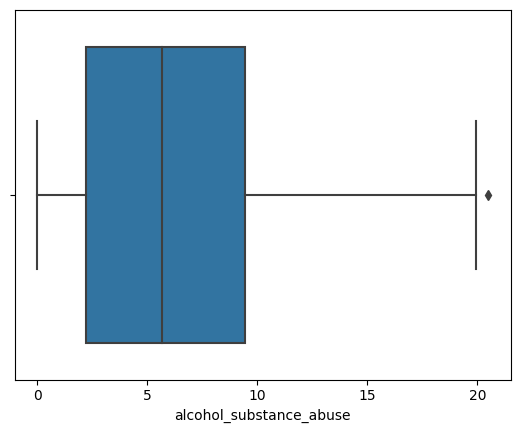

In [48]:
sns.boxplot(x=alcoholSubstanceAbuse['alcohol_substance_abuse'])

The middle 50% of the data (interquartile range) is represented by the box in the above plot. The median, represented by the line inside the box is around 5.5.

In [49]:
top_5_alcoholSubstanceAbuse = pd.unique(alcoholSubstanceAbuse_sorted['country'])[:5]
last_5_alcoholSubstanceAbuse = pd.unique(alcoholSubstanceAbuse_sorted['country'])[-5:]
last_5_alcoholSubstanceAbuse

array(['Germany', 'Uganda', 'Luxembourg', 'Lithuania', 'Czechia'],
      dtype=object)

The 5 countries with the lowest Alcohol and Substance Abuse:

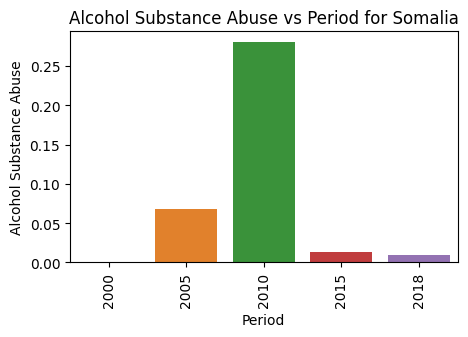

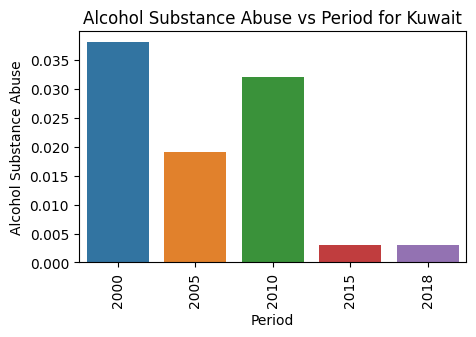

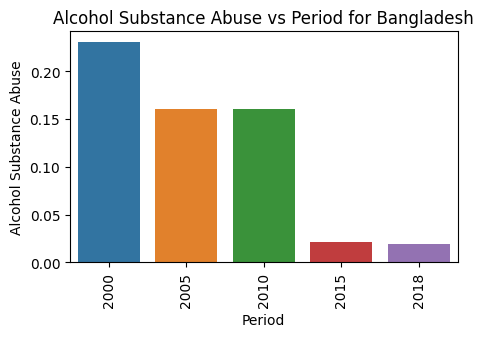

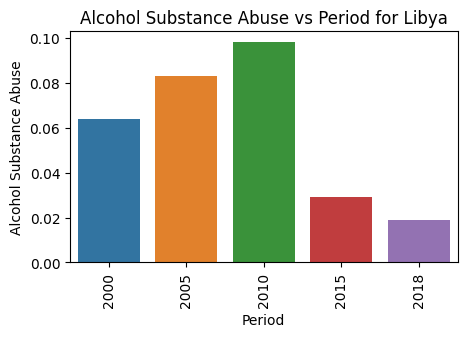

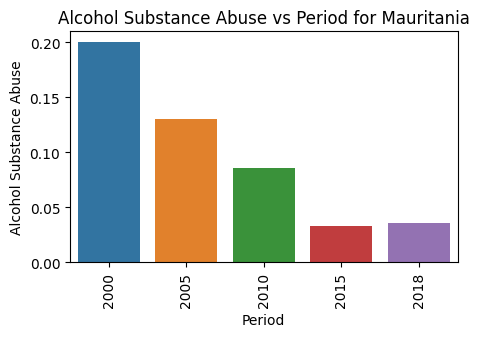

In [50]:
for i in top_5_alcoholSubstanceAbuse:
    alcoholSubstanceAbuse_specific_country = alcoholSubstanceAbuse[alcoholSubstanceAbuse['country'] == i]
    f, ax = plt.subplots(figsize=(5, 3))
    sns.set_color_codes("deep")
    sns.barplot(x=alcoholSubstanceAbuse_specific_country['period'],y=alcoholSubstanceAbuse_specific_country['alcohol_substance_abuse'])
    plt.title('Alcohol Substance Abuse vs Period for {}'.format(i))
    plt.xlabel('Period')
    plt.ylabel('Alcohol Substance Abuse')
    plt.xticks(fontsize=10, rotation=90)
    plt.show()

The 5 countries with the highest Alcohol and Substance Abuse:

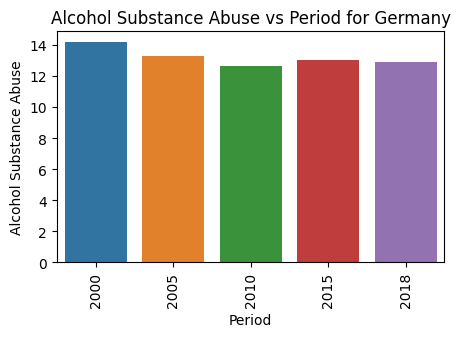

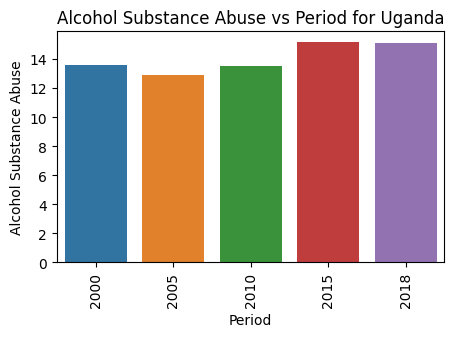

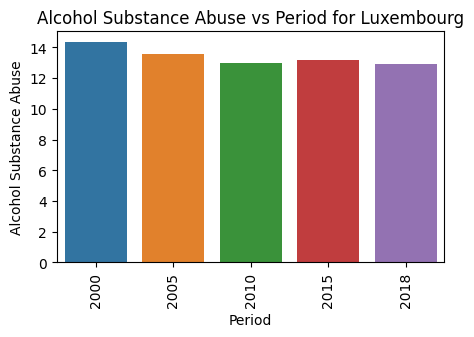

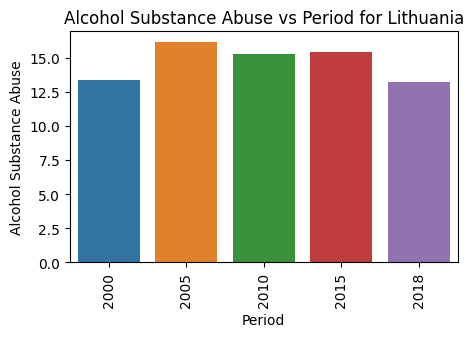

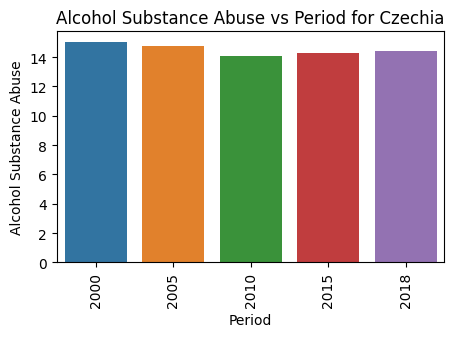

In [51]:
for i in last_5_alcoholSubstanceAbuse:
    alcoholSubstanceAbuse_specific_country = alcoholSubstanceAbuse[alcoholSubstanceAbuse['country'] == i]
    f, ax = plt.subplots(figsize=(5, 3))
    sns.set_color_codes("deep")
    sns.barplot(x=alcoholSubstanceAbuse_specific_country['period'],y=alcoholSubstanceAbuse_specific_country['alcohol_substance_abuse'])
    plt.title('Alcohol Substance Abuse vs Period for {}'.format(i))
    plt.xlabel('Period')
    plt.ylabel('Alcohol Substance Abuse')
    plt.xticks(fontsize=10, rotation=90)
    plt.show()

In [161]:
top_10_alcoholSubstanceAbuse = pd.unique(alcoholSubstanceAbuse_sorted['country'])[:10]
last_10_alcoholSubstanceAbuse = pd.unique(alcoholSubstanceAbuse_sorted['country'])[-10:]
last_10_alcoholSubstanceAbuse

array(['Romania', 'Portugal', 'Austria', 'Ireland', 'France', 'Germany',
       'Uganda', 'Luxembourg', 'Lithuania', 'Czechia'], dtype=object)

In [162]:
alcoholSubstanceAbuse_last10 = pd.DataFrame()
for i in last_10_alcoholSubstanceAbuse:
    alcoholSubstanceAbuse_last10 = pd.concat([alcoholSubstanceAbuse_last10, alcoholSubstanceAbuse[alcoholSubstanceAbuse['country'] == i]],axis=0)

alcoholSubstanceAbuse_top10 = pd.DataFrame()
for i in top_10_alcoholSubstanceAbuse:
    alcoholSubstanceAbuse_top10 = pd.concat([alcoholSubstanceAbuse_top10, alcoholSubstanceAbuse[alcoholSubstanceAbuse['country'] == i]],axis=0)

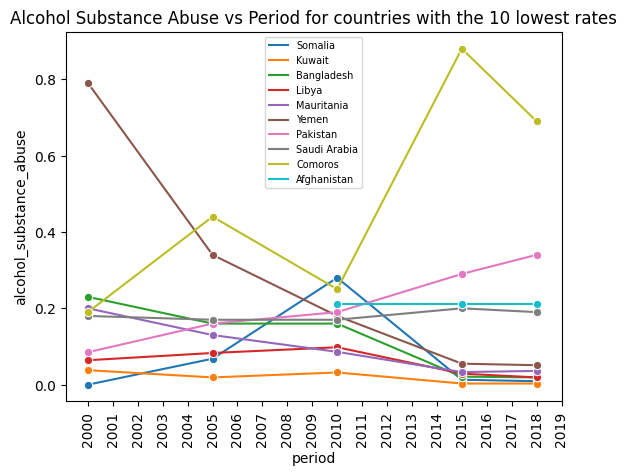

In [165]:
sns.lineplot(data=alcoholSubstanceAbuse_top10, x='period', y='alcohol_substance_abuse', hue='country', marker='o')
plt.xticks(range(2000, 2020, 1), rotation=90)
plt.title('Alcohol Substance Abuse vs Period for countries with the 10 lowest rates')
plt.legend(fontsize=7)
plt.show()

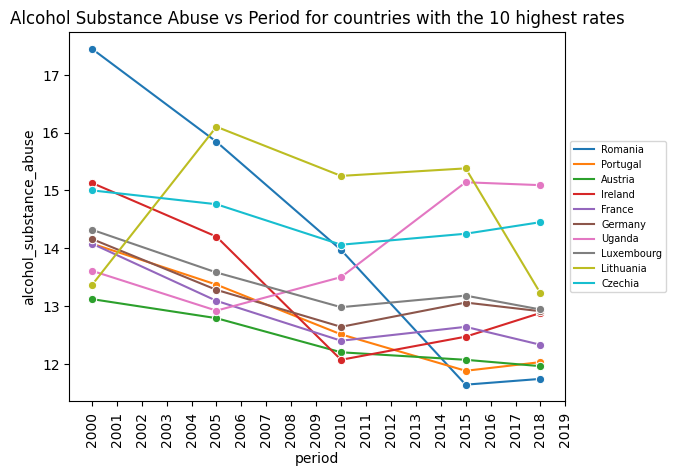

In [189]:
sns.lineplot(data=alcoholSubstanceAbuse_last10, x='period', y='alcohol_substance_abuse', hue='country', marker='o')
plt.xticks(range(2000, 2020, 1), rotation=90)
plt.title('Alcohol Substance Abuse vs Period for countries with the 10 highest rates')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5), fontsize=7)
plt.show()

The alcohol_substance_abuse goes down over the years for most countries, but some countries like Uganda and Comoros have seen an increase in alcohol and substance abuse. This increase could be because of changes in social norms or economic conditions, increased availability of drugs and alcohol, lack of access to education and resources, etc.

In [55]:
color_scale = px.colors.sequential.Plasma_r
fig = px.choropleth(alcoholSubstanceAbuse.sort_values(by = 'period'), locations='country', color = 'alcohol_substance_abuse', animation_frame='period', hover_name = 'country', locationmode='country names', color_continuous_scale= color_scale)
fig.update_layout(height = 560, width = 1000, margin=dict(t=0, b=0, l=0, r=0))

# Crude Suicide Rates

In [56]:
crudeSuicideRates.head()

Location  Period                                     Indicator  \
0  Afghanistan    2016  Crude suicide rates (per 100 000 population)   
1  Afghanistan    2016  Crude suicide rates (per 100 000 population)   
2  Afghanistan    2016  Crude suicide rates (per 100 000 population)   
3  Afghanistan    2015  Crude suicide rates (per 100 000 population)   
4  Afghanistan    2015  Crude suicide rates (per 100 000 population)   

         Dim1  First Tooltip  
0  Both sexes            0.0  
1        Male            0.0  
2      Female            0.0  
3  Both sexes            4.8  
4        Male            7.8

In [57]:
len(crudeSuicideRates)

2745

There are 2745 rows in this dataset.

In [58]:
crudeSuicideRates.columns.size

5

There are 5 columns in this dataset.

In [59]:
crudeSuicideRates['Indicator'].unique()

array(['Crude suicide rates (per 100 000 population)'], dtype=object)

Dropping the 'Indicator' column because its redundant and renaming the columns.

In [60]:
crudeSuicideRates = crudeSuicideRates.drop('Indicator', axis=1)
crudeSuicideRates.columns = ['country', 'period', 'sex','crude_suicide_rates']

In [61]:
crudeSuicideRates['sex'].unique()

array(['Both sexes', 'Male', 'Female'], dtype=object)

Considering only the 'Both sexes' from the 'sex' column values as the 'Male' and 'Female' values are not useful to our analysis. Then dropping the 'sex' column as its now redundant.

In [62]:
crudeSuicideRates = crudeSuicideRates[crudeSuicideRates['sex'] == 'Both sexes']
crudeSuicideRates = crudeSuicideRates.drop('sex', axis=1)
crudeSuicideRates.head()

country  period  crude_suicide_rates
0   Afghanistan    2016                  0.0
3   Afghanistan    2015                  4.8
6   Afghanistan    2010                  5.1
9   Afghanistan    2005                  6.3
12  Afghanistan    2000                  5.7

In [63]:
crudeSuicideRates.describe().T

count         mean       std     min      25%     50%  \
period               915.0  2009.200000  6.049793  2000.0  2005.00  2010.0   
crude_suicide_rates  915.0     8.083934  7.865360     0.0     2.75     6.5   

                        75%     max  
period               2015.0  2016.0  
crude_suicide_rates    11.6    52.6

The crude_suicide_rates variable has a mean of 8.08 and a standard deviation of 7.86, with values ranging from 0 to 52.6.

In [64]:
crudeSuicideRates['period'].nunique()

5

In [65]:
crudeSuicideRates['period'].value_counts()

2016    183
2015    183
2010    183
2005    183
2000    183
Name: period, dtype: int64

There are 5 unique period values: 2000, 2005, 2010, 2015, 2016.

In [66]:
crudeSuicideRates['country'].nunique()

184

There is data for 184 unique countries in this file.

In [68]:
crudeSuicideRates.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 915 entries, 0 to 2742
Data columns (total 3 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   country              915 non-null    object 
 1   period               915 non-null    int64  
 2   crude_suicide_rates  915 non-null    float64
dtypes: float64(1), int64(1), object(1)
memory usage: 28.6+ KB


In [69]:
crudeSuicideRates.isnull().sum()

country                0
period                 0
crude_suicide_rates    0
dtype: int64

There are no null values in any of the columns.


<AxesSubplot: xlabel='period', ylabel='crude_suicide_rates'>

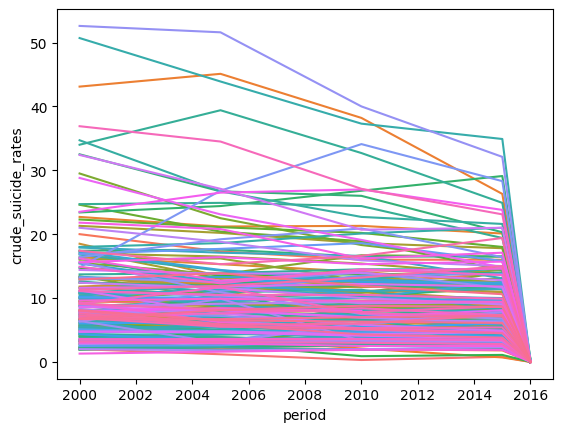

In [70]:
sns.lineplot(data=crudeSuicideRates, x='period', y='crude_suicide_rates', hue='country', legend=False)

The 2016 period values for crude suicide rates are all zero. Therfore, removing these rows.

In [71]:
crudeSuicideRates_specific_year = crudeSuicideRates[crudeSuicideRates['period'] == 2016]
crudeSuicideRates_specific_year.head()

country  period  crude_suicide_rates
0           Afghanistan    2016                  0.0
15              Albania    2016                  0.0
30              Algeria    2016                  0.0
45               Angola    2016                  0.0
60  Antigua and Barbuda    2016                  0.0

In [72]:
crudeSuicideRates = crudeSuicideRates.drop(crudeSuicideRates[crudeSuicideRates['period'] == 2016].index)

In [73]:
len(crudeSuicideRates)

732

After cleaning, there are 732 rows in this dataset.

In [74]:
crudeSuicideRates.columns.size

3

After cleaning, there are 3 columns in this dataset.

<AxesSubplot: xlabel='crude_suicide_rates'>

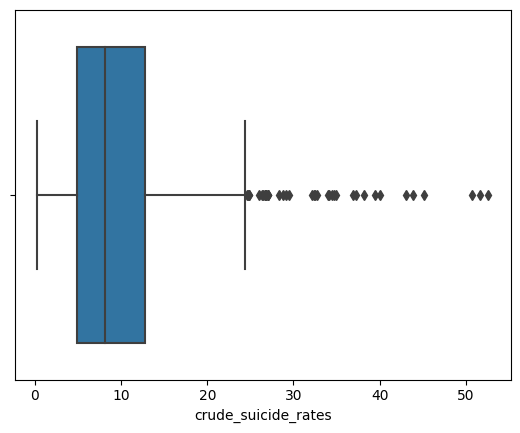

In [75]:
sns.boxplot(x=crudeSuicideRates['crude_suicide_rates'])

The middle 50% of the data (interquartile range) is represented by the box in the above plot. The median, represented by the line inside the box is around 7.

In [76]:
crudeSuicideRates_sorted=crudeSuicideRates.sort_values('crude_suicide_rates')

In [77]:
top_5_crudeSuicideRates = pd.unique(crudeSuicideRates_sorted['country'])[:5]
last_5_crudeSuicideRates = pd.unique(crudeSuicideRates_sorted['country'])[-5:]
last_5_crudeSuicideRates

array(['Suriname', 'Kazakhstan', 'Belarus', 'Russian Federation',
       'Lithuania'], dtype=object)

The 5 countries with the lowest Crude Suicide Rates:

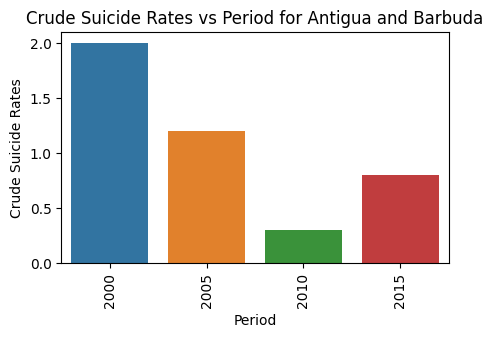

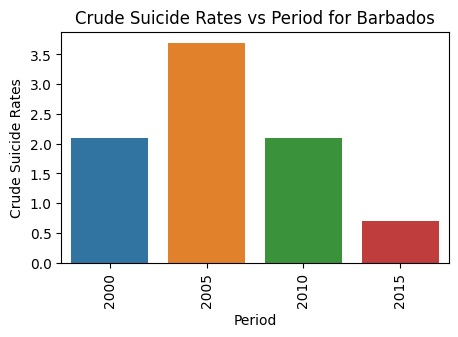

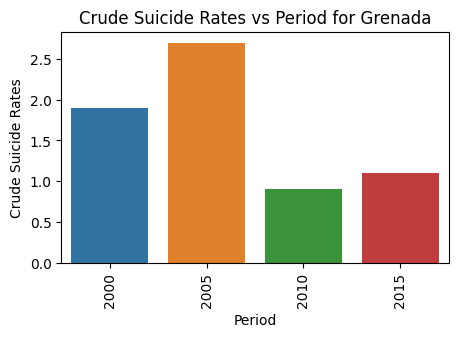

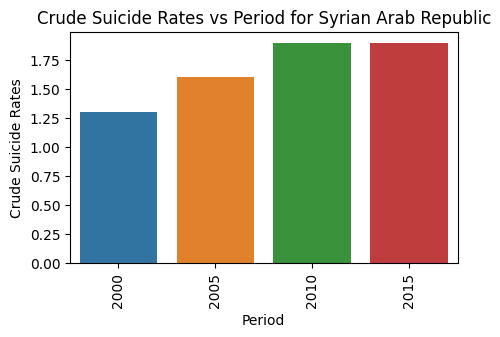

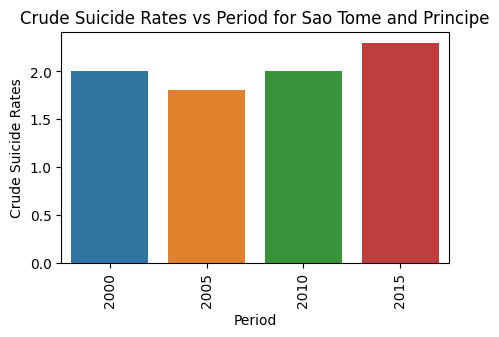

In [78]:
for i in top_5_crudeSuicideRates:
    crudeSuicideRates_specific_country = crudeSuicideRates[crudeSuicideRates['country'] == i]
    f, ax = plt.subplots(figsize=(5, 3))
    sns.set_color_codes("dark")
    sns.barplot(x=crudeSuicideRates_specific_country['period'],y=crudeSuicideRates_specific_country['crude_suicide_rates'])
    plt.title('Crude Suicide Rates vs Period for {}'.format(i))
    plt.xlabel('Period')
    plt.ylabel('Crude Suicide Rates')
    plt.xticks(fontsize=10, rotation=90)
    plt.show()

The 5 countries with the highest Crude Suicide Rates:

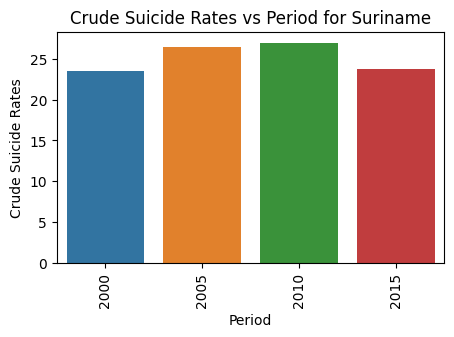

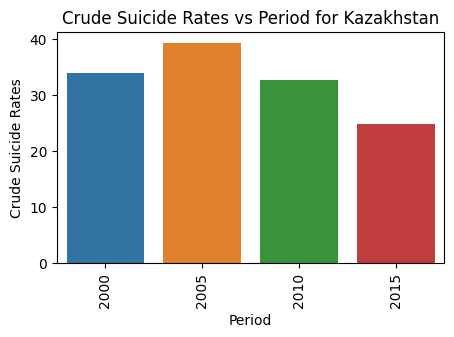

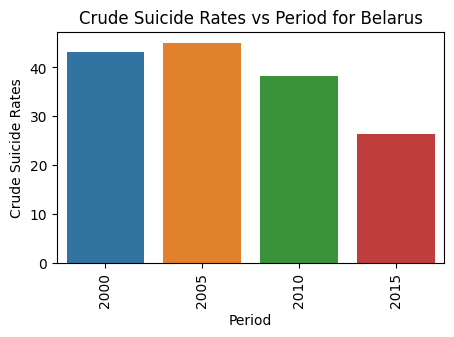

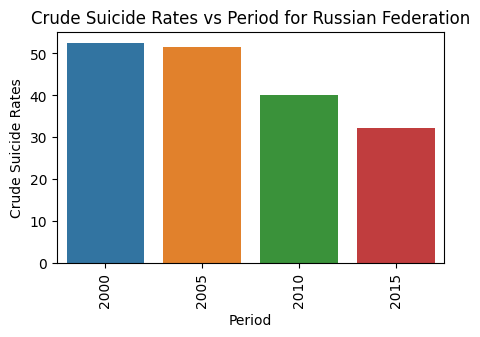

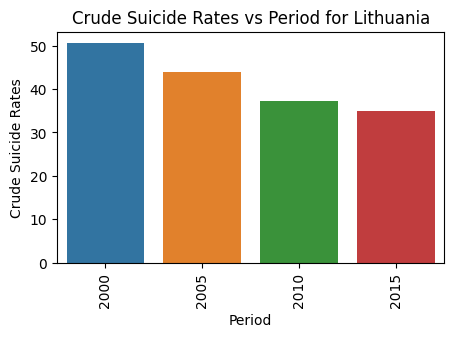

In [79]:
for i in last_5_crudeSuicideRates:
    crudeSuicideRates_specific_country = crudeSuicideRates[crudeSuicideRates['country'] == i]
    f, ax = plt.subplots(figsize=(5, 3))
    sns.set_color_codes("dark")
    sns.barplot(x=crudeSuicideRates_specific_country['period'],y=crudeSuicideRates_specific_country['crude_suicide_rates'])
    plt.title('Crude Suicide Rates vs Period for {}'.format(i))
    plt.xlabel('Period')
    plt.ylabel('Crude Suicide Rates')
    plt.xticks(fontsize=10, rotation=90)
    plt.show()

In [167]:
top_10_crudeSuicideRates = pd.unique(crudeSuicideRates_sorted['country'])[:10]
last_10_crudeSuicideRates = pd.unique(crudeSuicideRates_sorted['country'])[-10:]
last_10_crudeSuicideRates

array(['Hungary', 'Slovenia', 'Latvia', 'Ukraine', 'Guyana', 'Suriname',
       'Kazakhstan', 'Belarus', 'Russian Federation', 'Lithuania'],
      dtype=object)

In [168]:
crudeSuicideRates_last10 = pd.DataFrame()
for i in last_10_crudeSuicideRates:
    crudeSuicideRates_last10 = pd.concat([crudeSuicideRates_last10, crudeSuicideRates[crudeSuicideRates['country'] == i]],axis=0)

crudeSuicideRates_top10 = pd.DataFrame()
for i in top_10_crudeSuicideRates:
    crudeSuicideRates_top10 = pd.concat([crudeSuicideRates_top10, crudeSuicideRates[crudeSuicideRates['country'] == i]],axis=0)

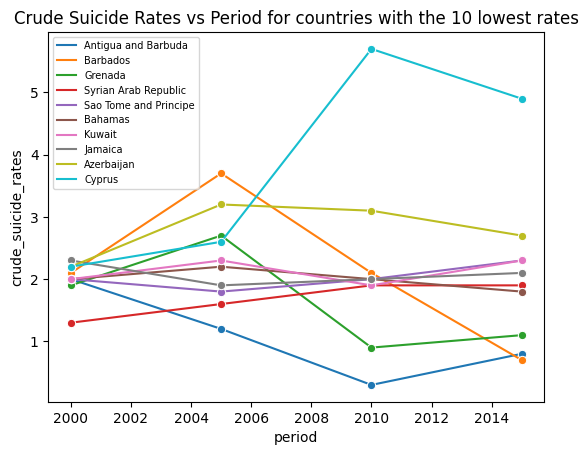

In [186]:
sns.lineplot(data=crudeSuicideRates_top10, x='period', y='crude_suicide_rates', hue='country', marker='o')
plt.title('Crude Suicide Rates vs Period for countries with the 10 lowest rates')
plt.legend(fontsize=7)
plt.show()

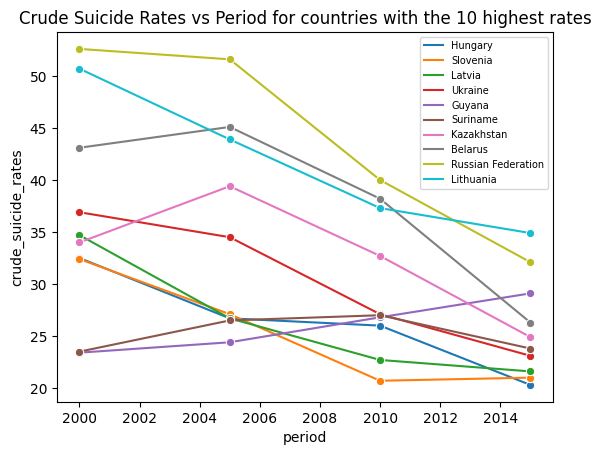

In [185]:
sns.lineplot(data=crudeSuicideRates_last10, x='period', y='crude_suicide_rates', hue='country', marker='o')
plt.title('Crude Suicide Rates vs Period for countries with the 10 highest rates')
plt.legend(fontsize=7)
plt.show()

The crude suicide rates are also decreasing over time except in Cyprus where its increasing.

In [83]:
color_scale = px.colors.sequential.Plasma_r
fig = px.choropleth(crudeSuicideRates.sort_values(by = 'period'), locations='country', color = 'crude_suicide_rates', animation_frame='period', hover_name = 'country', locationmode='country names', color_continuous_scale = color_scale)
fig.update_layout(height = 560, width = 1000, margin=dict(t=0, b=0, l=0, r=0))

# Population 25 SDG3

In [84]:
population25SDG3.head()

Location  Period                                          Indicator  \
0  Afghanistan    2013  Population with household expenditures on heal...   
1  Afghanistan    2013  Population with household expenditures on heal...   
2  Afghanistan    2013  Population with household expenditures on heal...   
3  Afghanistan    2007  Population with household expenditures on heal...   
4  Afghanistan    2007  Population with household expenditures on heal...   

    Dim1  First Tooltip  
0  Total           2.01  
1  Urban           1.49  
2  Rural           2.18  
3  Total           0.07  
4  Urban           0.00

In [85]:
len(population25SDG3)

1893

There are 1893 rows in this dataset.

In [86]:
population25SDG3.columns.size

5

There are 5 columns in this dataset.

In [87]:
population25SDG3['Indicator'].unique()

array(['Population with household expenditures on health greater than 25% of total household expenditure or income  ( SDG indicator 3.8.2) (%)'],
      dtype=object)

Dropping the 'Indicator' column because its redundant and renaming the columns.

In [88]:
population25SDG3 = population25SDG3.drop('Indicator', axis=1)
population25SDG3.columns = ['country', 'period', 'type','population_25']

In [89]:
population25SDG3['type'].unique()

array(['Total', 'Urban', 'Rural'], dtype=object)

Considering only the 'Total' from the 'type' column values as the 'Urban' and 'Rural' values are not useful to our analysis. Then dropping the 'type' column as its now redundant.

In [90]:
population25SDG3 = population25SDG3[population25SDG3['type'] == 'Total']
population25SDG3 = population25SDG3.drop('type', axis=1)
population25SDG3.head()

country  period  population_25
0   Afghanistan    2013           2.01
3   Afghanistan    2007           0.07
6       Albania    2012           4.95
9       Albania    2008           4.08
12      Albania    2005           4.50

In [91]:
population25SDG3.describe().T

count         mean       std     min       25%      50%  \
period         711.0  2005.915612  6.237431  1985.0  2002.000  2007.00   
population_25  711.0     1.660014  1.846126     0.0     0.435     1.08   

                    75%      max  
period         2011.000  2018.00  
population_25     2.425    22.16

The population_25 variable has a mean of 1.66 and a standard deviation of 1.84, ranging from 0 to 22.16.

In [92]:
population25SDG3['period'].nunique()

33

In [143]:
population25SDG3['period'].value_counts().sort_index()

1985     2
1986     2
1987     1
1988     1
1990     2
1991     3
1992     3
1993     6
1994     5
1995    12
1996    14
1997    18
1998    26
1999    22
2000    30
2001    27
2002    37
2003    35
2004    39
2005    38
2006    32
2007    44
2008    35
2009    37
2010    55
2011    35
2012    39
2013    30
2014    31
2015    23
2016    22
2017     3
2018     2
Name: period, dtype: int64

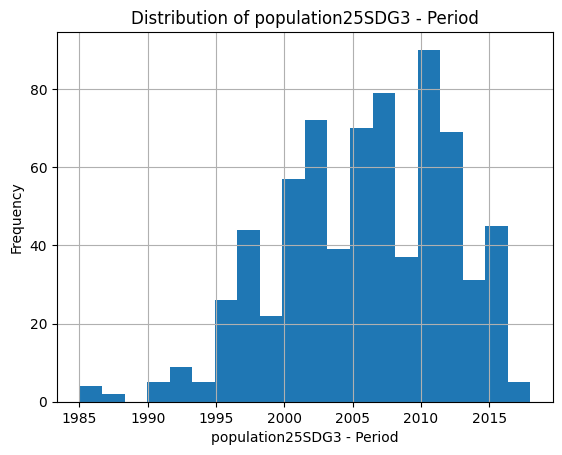

In [94]:
population25SDG3['period'].hist(bins=20)
plt.title('Distribution of population25SDG3 - Period')
plt.xlabel('population25SDG3 - Period')
plt.ylabel('Frequency')
plt.show()

There are 33 unique period values ranging from 1985 to 2018.

In [95]:
crudeSuicideRates['country'].nunique()

184

There is data for 184 unique countries in this file.

In [96]:
len(population25SDG3)

711

After cleaning, there are 711 rows in this dataset.

In [97]:
population25SDG3.columns.size

3

After cleaning, there are 3 columns in this dataset.

In [98]:
population25SDG3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 711 entries, 0 to 1890
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   country        711 non-null    object 
 1   period         711 non-null    int64  
 2   population_25  711 non-null    float64
dtypes: float64(1), int64(1), object(1)
memory usage: 22.2+ KB


In [99]:
population25SDG3.isnull().sum()

country          0
period           0
population_25    0
dtype: int64

There are no null values in any of the columns.


<AxesSubplot: xlabel='population_25'>

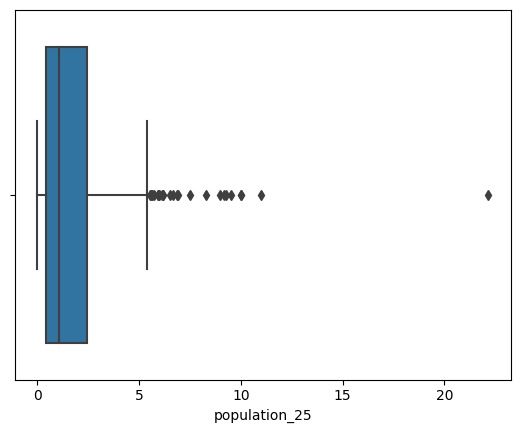

In [100]:
sns.boxplot(x=population25SDG3['population_25'])

The middle 50% of the data (interquartile range) is represented by the box in the above plot. The median, represented by the line inside the box is around 1.

In [101]:
population25SDG3_sorted=population25SDG3.sort_values('population_25')

The 5 countries with the lowest population with household expenditures on health greater than 25% of total household expenditure or income:

In [102]:
top_5_population25SDG3 = pd.unique(population25SDG3_sorted['country'])[:5]
last_5_population25SDG3 = pd.unique(population25SDG3_sorted['country'])[-5:]
last_5_population25SDG3

array(['Angola', 'Dominican Republic', 'Cambodia', 'Switzerland',
       'Lebanon'], dtype=object)

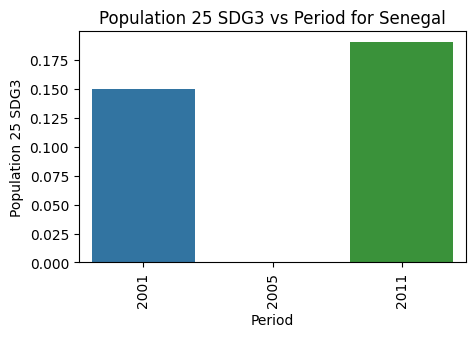

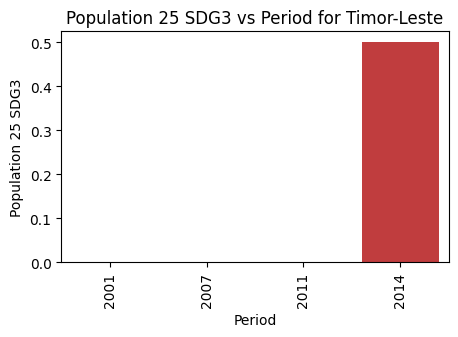

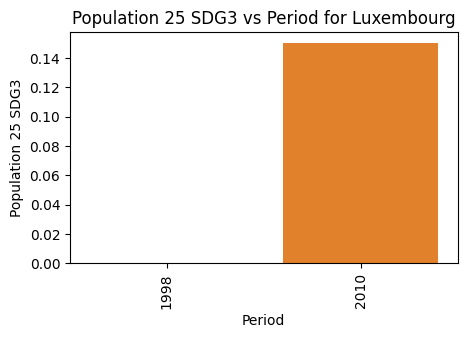

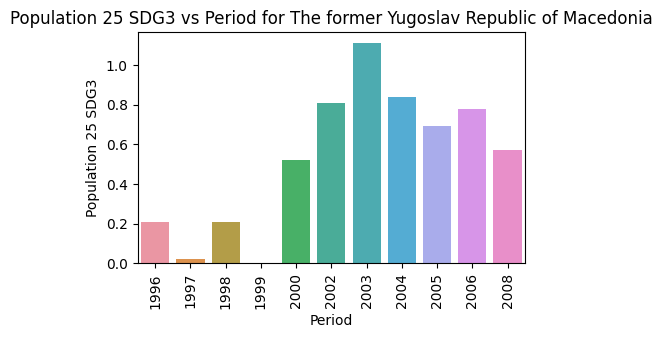

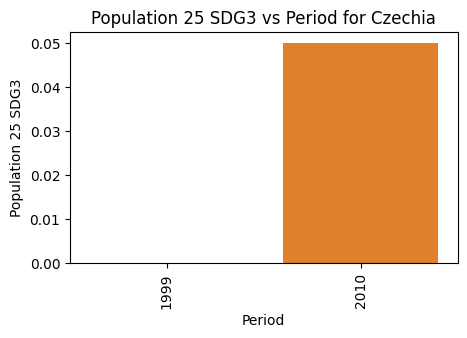

In [103]:
for i in top_5_population25SDG3:
    population25SDG3_specific_country = population25SDG3[population25SDG3['country'] == i]
    f, ax = plt.subplots(figsize=(5, 3))
    sns.set_color_codes("dark")
    sns.barplot(x=population25SDG3_specific_country['period'],y=population25SDG3_specific_country['population_25'])
    plt.title('Population 25 SDG3 vs Period for {}'.format(i))
    plt.xlabel('Period')
    plt.ylabel('Population 25 SDG3')
    plt.xticks(fontsize=10, rotation=90)
    plt.show()

The 5 countries with the highest population with household expenditures on health greater than 25% of total household expenditure or income:

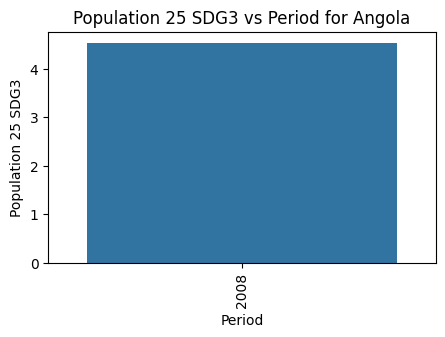

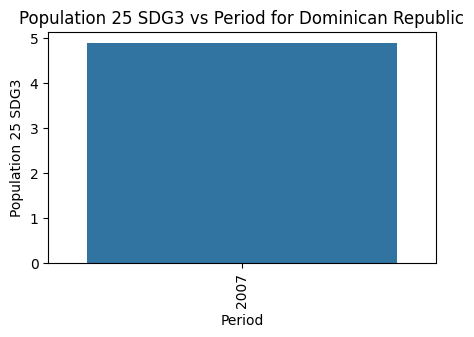

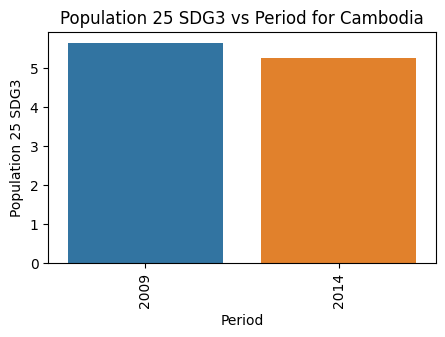

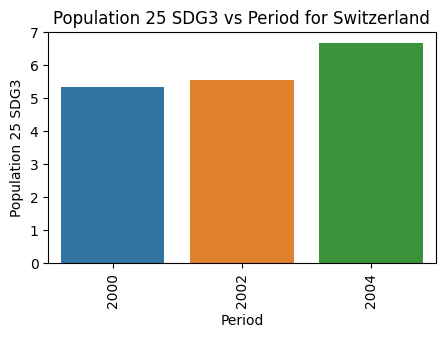

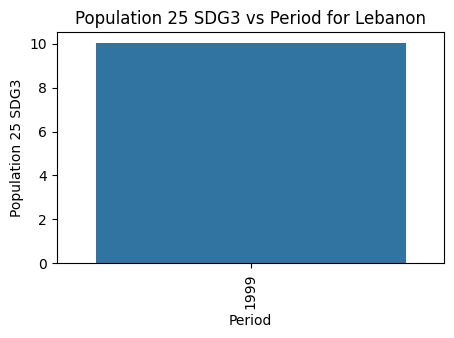

In [104]:
for i in last_5_population25SDG3:
    population25SDG3_specific_country = population25SDG3[population25SDG3['country'] == i]
    f, ax = plt.subplots(figsize=(5, 3))
    sns.set_color_codes("bright")
    sns.barplot(x=population25SDG3_specific_country['period'],y=population25SDG3_specific_country['population_25'])
    plt.title('Population 25 SDG3 vs Period for {}'.format(i))
    plt.xlabel('Period')
    plt.ylabel('Population 25 SDG3')
    plt.xticks(fontsize=10, rotation=90)
    plt.show()

In [171]:
top_10_population25SDG3 = pd.unique(population25SDG3_sorted['country'])[:10]
last_10_population25SDG3 = pd.unique(population25SDG3_sorted['country'])[-10:]
last_10_population25SDG3

array(['Sudan (until 2011)', 'Brazil', 'Bangladesh', 'Barbados',
       'Nigeria', 'Angola', 'Dominican Republic', 'Cambodia',
       'Switzerland', 'Lebanon'], dtype=object)

In [172]:
population25SDG3_last10 = pd.DataFrame()
for i in last_10_population25SDG3:
    population25SDG3_last10 = pd.concat([population25SDG3_last10, population25SDG3[population25SDG3['country'] == i]],axis=0)

population25SDG3_top10 = pd.DataFrame()
for i in top_10_population25SDG3:
    population25SDG3_top10 = pd.concat([population25SDG3_top10, population25SDG3[population25SDG3['country'] == i]],axis=0)

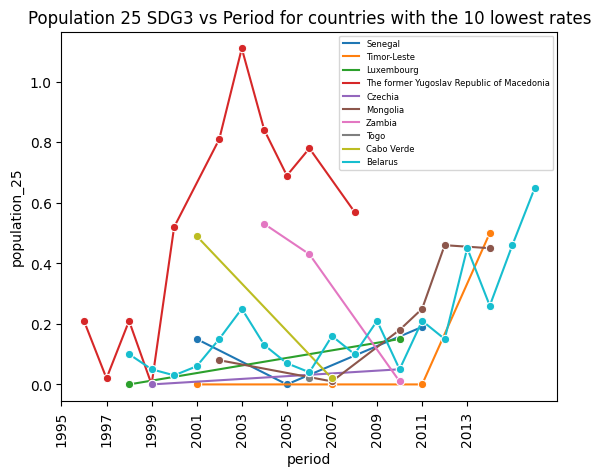

In [177]:
sns.lineplot(data=population25SDG3_top10, x='period', y='population_25', hue='country', marker='o')
plt.xticks(range(1995, 2015, 2), rotation=90)
plt.title('Population 25 SDG3 vs Period for countries with the 10 lowest rates')
plt.legend(fontsize=6)
plt.show()

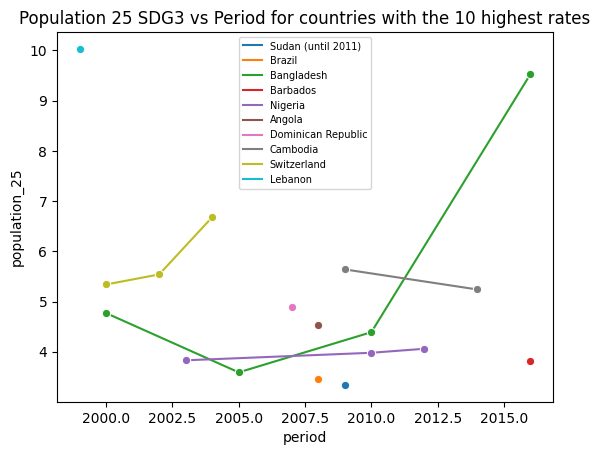

In [178]:
sns.lineplot(data=population25SDG3_last10, x='period', y='population_25', hue='country', marker='o')
plt.title('Population 25 SDG3 vs Period for countries with the 10 highest rates')
plt.legend(fontsize=7)
plt.show()

There is not a lot of data to observe trends in the population with household expenditures on health greater than 25% of total household expenditure or income. But overall, we can see an increase.

In [108]:
fig = px.choropleth(population25SDG3.sort_values(by = 'period'), locations='country', color = 'population_25', animation_frame='period', hover_name = 'country', locationmode='country names', color_continuous_scale= 'inferno')
fig.update_layout(height = 560, width = 1000, margin=dict(t=0, b=0, l=0, r=0))

# Life Expectancy At Birth

In [109]:
lifeExpectancyAtBirth.head()

Location  Period                         Indicator        Dim1  \
0  Afghanistan    2019  Life expectancy at birth (years)  Both sexes   
1  Afghanistan    2019  Life expectancy at birth (years)        Male   
2  Afghanistan    2019  Life expectancy at birth (years)      Female   
3  Afghanistan    2015  Life expectancy at birth (years)  Both sexes   
4  Afghanistan    2015  Life expectancy at birth (years)        Male   

   First Tooltip  
0          63.21  
1          63.29  
2          63.16  
3          61.65  
4          61.04

In [110]:
len(lifeExpectancyAtBirth)

2197

There are 2197 rows in this dataset.

In [111]:
lifeExpectancyAtBirth.columns.size

5

There are 5 columns in this dataset.

In [112]:
lifeExpectancyAtBirth['Indicator'].unique()

array(['Life expectancy at birth (years)'], dtype=object)

Dropping the 'Indicator' column because its redundant and renaming the columns.

In [113]:
lifeExpectancyAtBirth = lifeExpectancyAtBirth.drop('Indicator', axis=1)
lifeExpectancyAtBirth.columns = ['country', 'period', 'sex','life_expectancy_at_birth']

In [114]:
lifeExpectancyAtBirth['sex'].unique()

array(['Both sexes', 'Male', 'Female'], dtype=object)

Considering only the 'Both sexes' from the 'sex' column values as the 'Male' and 'Female' values are not useful to our analysis. Then dropping the 'sex' column as its now redundant.

In [115]:
lifeExpectancyAtBirth = lifeExpectancyAtBirth[lifeExpectancyAtBirth['sex'] == 'Both sexes']
lifeExpectancyAtBirth = lifeExpectancyAtBirth.drop('sex', axis=1)
lifeExpectancyAtBirth.head()

country  period  life_expectancy_at_birth
0   Afghanistan    2019                     63.21
3   Afghanistan    2015                     61.65
6   Afghanistan    2010                     59.94
9   Afghanistan    2000                     54.99
12      Albania    2019                     78.00

In [116]:
lifeExpectancyAtBirth['period'].nunique()

5

In [117]:
lifeExpectancyAtBirth['period'].value_counts()

2019    183
2015    183
2010    183
2000    183
1920      1
Name: period, dtype: int64

There are 5 unique period columns: 1920, 2000, 2010, 2015, 2019. We can drop the 1920 value, as there is only one entry for it.

In [118]:
lifeExpectancyAtBirth = lifeExpectancyAtBirth.drop(lifeExpectancyAtBirth[lifeExpectancyAtBirth['period'] == 1920].index)

In [119]:
lifeExpectancyAtBirth.describe().T

count         mean       std      min      25%  \
period                    732.0  2011.000000  7.111194  2000.00  2007.50   
life_expectancy_at_birth  732.0    70.198579  8.672451    31.28    64.43   

                              50%      75%      max  
period                    2012.50  2016.00  2019.00  
life_expectancy_at_birth    72.13    76.44    84.26

The infant mortality rate variable has a mean of 70.19 and a standard deviation of 8.67, ranging from 31.28 to 84.26.

In [120]:
lifeExpectancyAtBirth['country'].nunique()

184

There is data for 184 unique countries in this file.

In [121]:
len(lifeExpectancyAtBirth)

732

After cleaning, there are 732 rows in this dataset.

In [122]:
lifeExpectancyAtBirth.columns.size

3

After cleaning, there are 3 columns in this dataset.

In [123]:
lifeExpectancyAtBirth.isnull().sum()

country                     0
period                      0
life_expectancy_at_birth    0
dtype: int64

There are no null values in any of the columns.

In [124]:
lifeExpectancyAtBirth.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 732 entries, 0 to 2194
Data columns (total 3 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   country                   732 non-null    object 
 1   period                    732 non-null    int64  
 2   life_expectancy_at_birth  732 non-null    float64
dtypes: float64(1), int64(1), object(1)
memory usage: 22.9+ KB


<AxesSubplot: xlabel='life_expectancy_at_birth'>

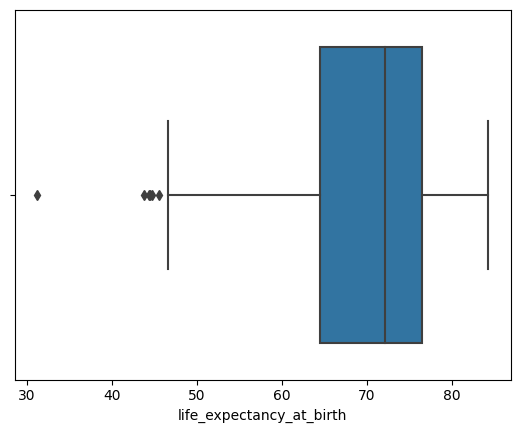

In [125]:
sns.boxplot(x=lifeExpectancyAtBirth['life_expectancy_at_birth'])

The middle 50% of the data (interquartile range) is represented by the box in the above plot. The median, represented by the line inside the box is around 72.

In [126]:
lifeExpectancyAtBirth_sorted=lifeExpectancyAtBirth.sort_values('life_expectancy_at_birth')

In [127]:
top_5_lifeExpectancyAtBirth = pd.unique(lifeExpectancyAtBirth_sorted['country'])[:5]
last_5_lifeExpectancyAtBirth = pd.unique(lifeExpectancyAtBirth_sorted['country'])[-5:]
last_5_lifeExpectancyAtBirth

array(['Sweden', 'Australia', 'Iceland', 'Switzerland', 'Japan'],
      dtype=object)

The 5 countries with the lowest life_expectancy_at_birth:

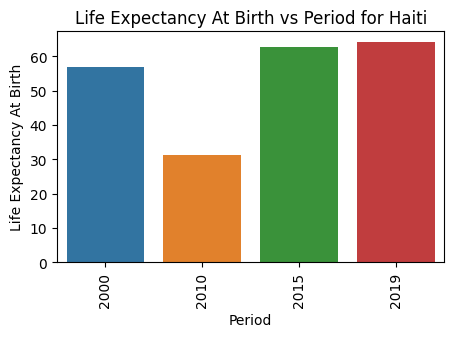

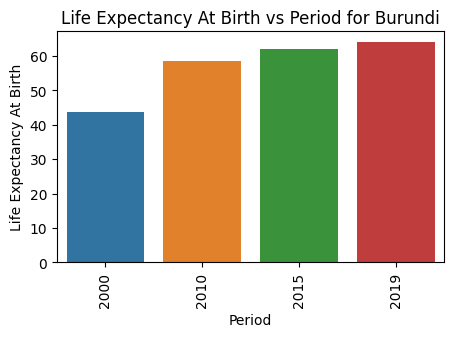

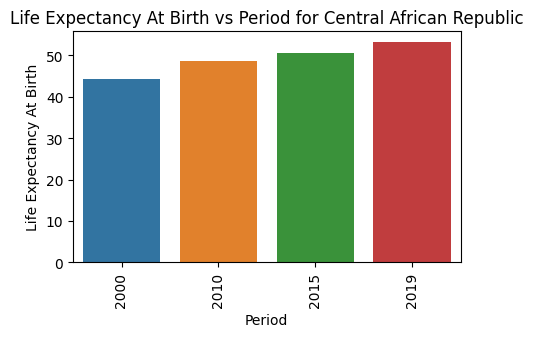

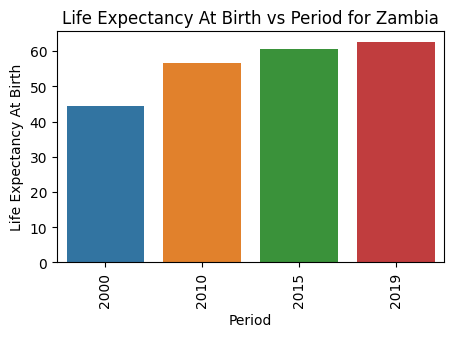

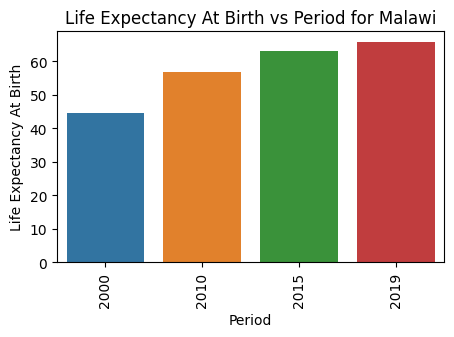

In [128]:
for i in top_5_lifeExpectancyAtBirth:
    lifeExpectancyAtBirth_specific_country = lifeExpectancyAtBirth[lifeExpectancyAtBirth['country'] == i]
    f, ax = plt.subplots(figsize=(5, 3))
    sns.set_color_codes("dark")
    sns.barplot(x=lifeExpectancyAtBirth_specific_country['period'],y=lifeExpectancyAtBirth_specific_country['life_expectancy_at_birth'])
    plt.title('Life Expectancy At Birth vs Period for {}'.format(i))
    plt.xlabel('Period')
    plt.ylabel('Life Expectancy At Birth')
    plt.xticks(fontsize=10, rotation=90)
    plt.show()

The 5 countries wth the highest life_expectancy_at_birth:

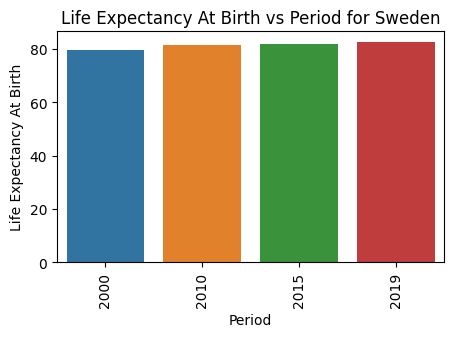

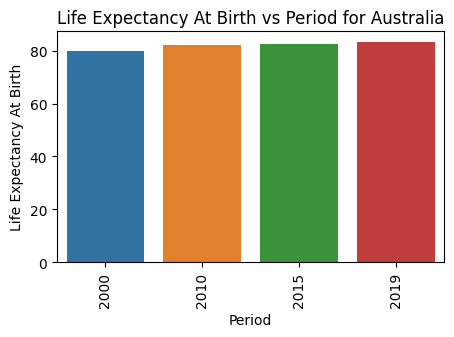

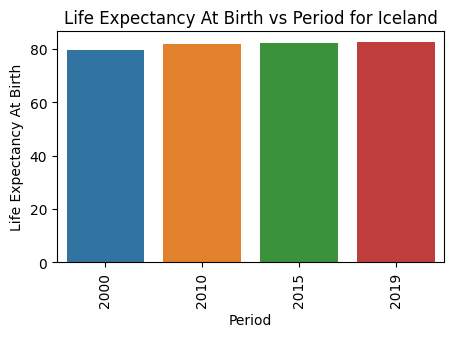

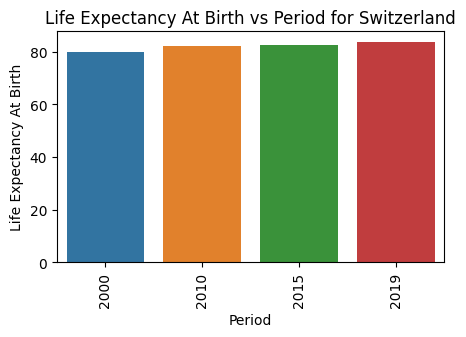

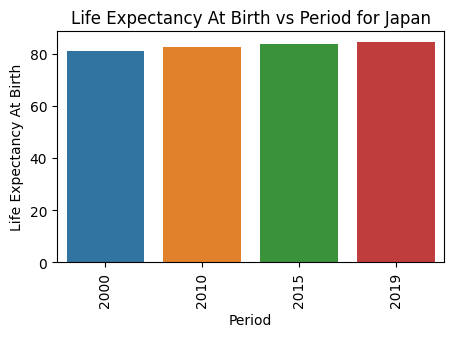

In [129]:
for i in last_5_lifeExpectancyAtBirth:
    lifeExpectancyAtBirth_specific_country = lifeExpectancyAtBirth[lifeExpectancyAtBirth['country'] == i]
    f, ax = plt.subplots(figsize=(5, 3))
    sns.set_color_codes("dark")
    sns.barplot(x=lifeExpectancyAtBirth_specific_country['period'],y=lifeExpectancyAtBirth_specific_country['life_expectancy_at_birth'])
    plt.title('Life Expectancy At Birth vs Period for {}'.format(i))
    plt.xlabel('Period')
    plt.ylabel('Life Expectancy At Birth')
    plt.xticks(fontsize=10, rotation=90)
    plt.show()

In [179]:
top_10_lifeExpectancyAtBirth = pd.unique(lifeExpectancyAtBirth_sorted['country'])[:10]
last_10_lifeExpectancyAtBirth = pd.unique(lifeExpectancyAtBirth_sorted['country'])[-10:]
last_10_lifeExpectancyAtBirth

array(['Cyprus', 'France', 'Spain', 'Canada', 'Italy', 'Sweden',
       'Australia', 'Iceland', 'Switzerland', 'Japan'], dtype=object)

In [180]:
lifeExpectancyAtBirth_last10 = pd.DataFrame()
for i in last_10_lifeExpectancyAtBirth:
    lifeExpectancyAtBirth_last10 = pd.concat([lifeExpectancyAtBirth_last10, lifeExpectancyAtBirth[lifeExpectancyAtBirth['country'] == i]],axis=0)

lifeExpectancyAtBirth_top10 = pd.DataFrame()
for i in top_10_lifeExpectancyAtBirth:
    lifeExpectancyAtBirth_top10 = pd.concat([lifeExpectancyAtBirth_top10, lifeExpectancyAtBirth[lifeExpectancyAtBirth['country'] == i]],axis=0)

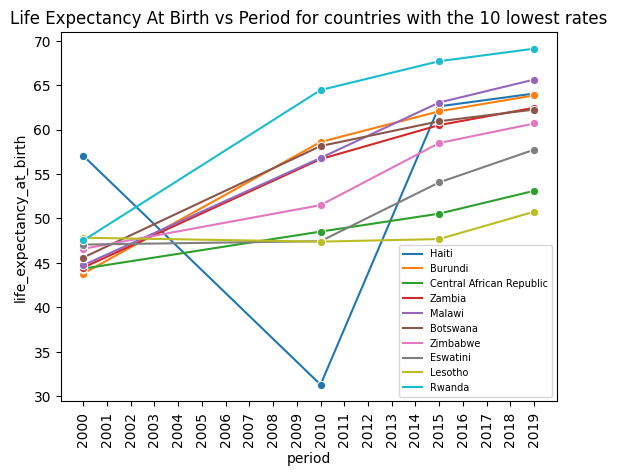

In [183]:
sns.lineplot(data=lifeExpectancyAtBirth_top10, x='period', y='life_expectancy_at_birth', hue='country', marker='o')
plt.xticks(range(2000, 2020, 1), rotation=90)
plt.title('Life Expectancy At Birth vs Period for countries with the 10 lowest rates')
plt.legend(fontsize=7)
plt.show()

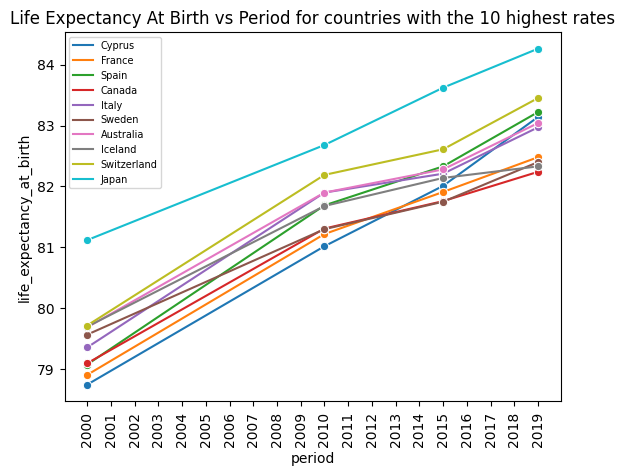

In [184]:
sns.lineplot(data=lifeExpectancyAtBirth_last10, x='period', y='life_expectancy_at_birth', hue='country', marker='o')
plt.xticks(range(2000, 2020, 1), rotation=90)
plt.title('Life Expectancy At Birth vs Period for countries with the 10 highest rates')
plt.legend(fontsize=7)
plt.show()

The life expectancy at birth has increased for all countries over the years. Haiti has seen a drop in life expectancy in 2010. Haiti's life expectancy at birth in 2010 was low due to a combination of factors, including poverty, inadequate healthcare, and frequent natural disasters.

In [133]:
color_scale = px.colors.sequential.Plasma_r
fig = px.choropleth(lifeExpectancyAtBirth.sort_values(by = 'period'), locations='country', color = 'life_expectancy_at_birth', animation_frame='period', hover_name = 'country', locationmode='country names', color_continuous_scale= color_scale)
fig.update_layout(height = 560, width = 1000, margin=dict(t=0, b=0, l=0, r=0))

In [134]:
infantMortalityRate.to_csv("cleaned_infantMortalityRate.csv", index=False)
alcoholSubstanceAbuse.to_csv("cleaned_alcoholSubstanceAbuse.csv", index=False)
crudeSuicideRates.to_csv("cleaned_crudeSuicideRates.csv", index=False)
population25SDG3.to_csv("cleaned_population25SDG3.csv", index=False)
lifeExpectancyAtBirth.to_csv("cleaned_lifeExpectancyAtBirth.csv", index=False)

# RELATIONSHIPS

ALCOHOL SUBSTANCE ABUSE VS. CRUDE SUICIDE RATES

In [135]:
alcohol_crude = pd.merge(alcoholSubstanceAbuse, crudeSuicideRates, on=['country', 'period'])

In [144]:
all = pd.merge(alcohol_crude, infantMortalityRate, on=['country', 'period'])
all= pd.merge(all, lifeExpectancyAtBirth, on=['country', 'period'])
all= pd.merge(all, population25SDG3, on=['country', 'period'])

In [145]:
correlation=all.drop(columns='period')

In [146]:
correlation.corr(numeric_only=True)

alcohol_substance_abuse  crude_suicide_rates  \
alcohol_substance_abuse                  1.000000             0.585193   
crude_suicide_rates                      0.585193             1.000000   
infant_mortality_rate                   -0.608460            -0.373095   
life_expectancy_at_birth                 0.348224             0.094422   
population_25                           -0.079923            -0.069250   

                          infant_mortality_rate  life_expectancy_at_birth  \
alcohol_substance_abuse               -0.608460                  0.348224   
crude_suicide_rates                   -0.373095                  0.094422   
infant_mortality_rate                  1.000000                 -0.842633   
life_expectancy_at_birth              -0.842633                  1.000000   
population_25                          0.088239                  0.045006   

                          population_25  
alcohol_substance_abuse       -0.079923  
crude_suicide_rates           -0.069250  
infant_mortality_rate          0.088239  
life_expectancy_at_birth       0.045006  
population_25                  1.000000

<AxesSubplot: >

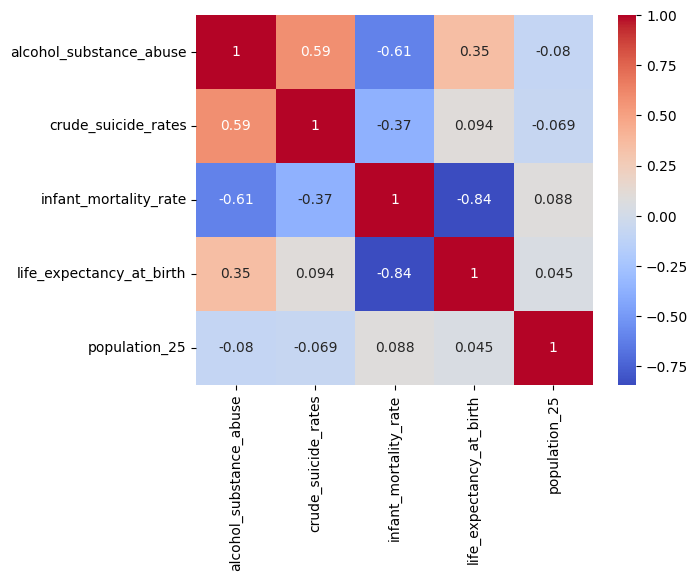

In [147]:
sns.heatmap(correlation.corr(numeric_only=True),annot=True, cmap='coolwarm')

The correlation between alcohol substance abuse and crude suicide rates is significant (0.59) indicating that higher rates of alcohol and substance abuse are associated with higher suicide rates. The correlation between alcohol substance abuse and life expectancy at birth is weak but significant (0.34).

There is quite a strong negative correlation between alcohol and substance abuse and infant mortality rate (-0.61), suggesting that higher rates of alcohol and substance abuse are associated with lower rates of infant mortality.

Given that lower life expectancies are typically associated with greater infant mortality rates, there is a strong negative correlation between the infant mortality rate and life expectancy at birth (-0.84). 

‘Population_25’ represents the population with household expenditures on health greater than 25% of total household expenditure or income. This attribute has no significant correlations with the other health attributes.
